# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticity10'
simulation_time = 3000
analysis_time = 300.0
analysis_step = 100.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIF'
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 1.46
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 7.0e-10

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-07-03 12:10:20,010 - P22102 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 3000s
2018-07-03 12:10:20,040 - P22102 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-07-03 12:10:20,155 - P22102 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-07-03 12:10:20,157 - P22102 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGoCPlasticity10
2018-07-03 12:10:20,202 - P22102 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-07-03 12:10:20,206 - P22102 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-07-03 12:10:20,225 - P22102 - MemTotal:88M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2018-07-03 12:10:20,226 - P22102 - MemTotal:88M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2018-07-03 12:10:20,229 - P22102 - MemTotal:88M - Simulation - WARNING: Non-specified cell model para

Define a function to obtain the average firing rate

In [ ]:
def obtain_fr(init_time,end_time):
    min_neuron = 0
    max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
    import numpy
    firing_frequency = float(len(gcell_id)) / ((end_time-init_time)*max_neuron)
    return firing_frequency

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


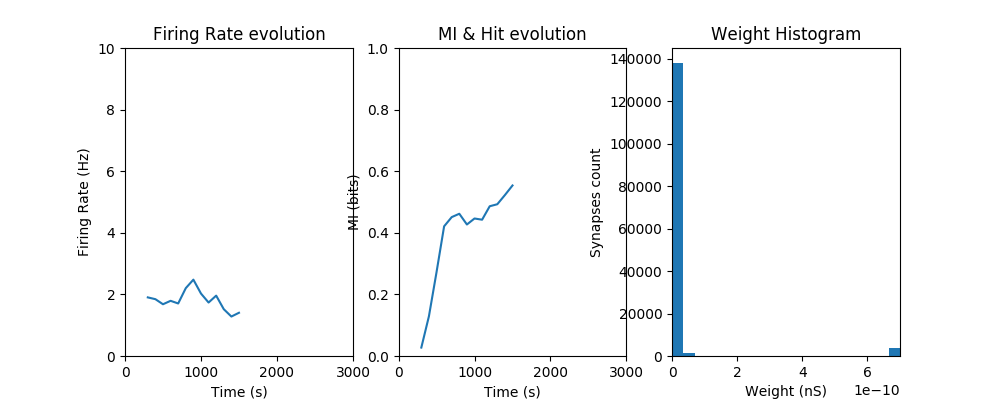

2018-07-03 12:10:30,439 - P22102 - MemTotal:1132M - Simulation - INFO: Running the simulation from 0.0s until time 300.0s
2018-07-03 12:10:30,461 - P22102 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2018-07-03 12:10:30,738 - P22102 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.274775028229 seconds. Real-time rate: 0.6441633402459023
2018-07-03 12:10:30,755 - P22102 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.11299999999999999s until 0.29s
2018-07-03 12:10:30,900 - P22102 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.142781019211 seconds. Real-time rate: 0.7914217213504834
2018-07-03 12:10:30,919 - P22102 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.964s until 1.254s
2018-07-03 12:10:31,993 - P22102 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 1.07207989693 seconds. Real-time rate: 0.8991867143142118
2018-07-03 12:10:32,011 - P22102 - MemTotal:1133M - Simulation - DEBUG:

2018-07-03 12:10:38,851 - P22102 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.7320000000000002s until 7.409s
2018-07-03 12:10:39,683 - P22102 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.829185962677 seconds. Real-time rate: 0.8827935263601909
2018-07-03 12:10:39,700 - P22102 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.04699999999999971s until 7.4559999999999995s
2018-07-03 12:10:39,765 - P22102 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.0632219314575 seconds. Real-time rate: 0.743412909356941
2018-07-03 12:10:39,783 - P22102 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.21699999999999964s until 7.672999999999999s
2018-07-03 12:10:40,072 - P22102 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.287703037262 seconds. Real-time rate: 0.7542499448916632
2018-07-03 12:10:40,089 - P22102 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.07000000000000028s until 7.742999999999999

2018-07-03 12:10:48,149 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.293859004974 seconds. Real-time rate: 0.8643601036563682
2018-07-03 12:10:48,165 - P22102 - MemTotal:1106M - Simulation - DEBUG: Running the simulation 0.7140000000000004s until 13.686000000000002s
2018-07-03 12:10:48,960 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.79344201088 seconds. Real-time rate: 0.8998767272337191
2018-07-03 12:10:48,978 - P22102 - MemTotal:1106M - Simulation - DEBUG: Running the simulation 0.11100000000000065s until 13.797000000000002s
2018-07-03 12:10:49,101 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.12159705162 seconds. Real-time rate: 0.9128510808505685
2018-07-03 12:10:49,140 - P22102 - MemTotal:1106M - Simulation - DEBUG: Running the simulation 0.2400000000000002s until 14.037000000000003s
2018-07-03 12:10:49,475 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.334077835083 seconds. Real-time rat

2018-07-03 12:10:56,723 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.189112901688 seconds. Real-time rate: 0.6186780434116665
2018-07-03 12:10:56,739 - P22102 - MemTotal:1106M - Simulation - DEBUG: Running the simulation 0.10300000000000153s until 19.924000000000003s
2018-07-03 12:10:56,905 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.164236068726 seconds. Real-time rate: 0.6271460392302693
2018-07-03 12:10:56,925 - P22102 - MemTotal:1106M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 19.997000000000003s
2018-07-03 12:10:57,007 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.080267906189 seconds. Real-time rate: 0.9094543942400277
2018-07-03 12:10:57,024 - P22102 - MemTotal:1106M - Simulation - DEBUG: Running the simulation 0.22500000000000142s until 20.222000000000005s
2018-07-03 12:10:57,030 - P22102 - MemTotal:1106M - Simulation - DEBUG: Simulation time is 0.00448799133301 seconds. Real-tim

2018-07-03 12:11:05,017 - P22102 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.017835855484 seconds. Real-time rate: 0.9531362269245376
2018-07-03 12:11:05,032 - P22102 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.16799999999999926s until 25.168s
2018-07-03 12:11:05,211 - P22102 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.177221059799 seconds. Real-time rate: 0.9479686002913916
2018-07-03 12:11:05,226 - P22102 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.2270000000000003s until 25.395s
2018-07-03 12:11:05,494 - P22102 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.265627145767 seconds. Real-time rate: 0.8545813318302063
2018-07-03 12:11:05,511 - P22102 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.07499999999999929s until 25.47s
2018-07-03 12:11:05,607 - P22102 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.0943989753723 seconds. Real-time rate: 0.7945001490132219
2018-07-03 

2018-07-03 12:11:11,422 - P22102 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.047999999999998266s until 29.913999999999998s
2018-07-03 12:11:11,476 - P22102 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.0521938800812 seconds. Real-time rate: 0.9196480492606455
2018-07-03 12:11:11,491 - P22102 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.7100000000000009s until 30.624s
2018-07-03 12:11:11,586 - P22102 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.092707157135 seconds. Real-time rate: 0.9276522186389554
2018-07-03 12:11:11,588 - P22102 - MemTotal:1190M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:11:11,590 - P22102 - MemTotal:1190M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:11:13,081 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.761340141296 seconds. Real-time rate: 0.8196073819744624
2018-07-03 12:11:

2018-07-03 12:11:20,966 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.572800159454 seconds. Real-time rate: 0.7524439246151252
2018-07-03 12:11:20,985 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.04899999999999949s until 36.227000000000004s
2018-07-03 12:11:21,047 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0606000423431 seconds. Real-time rate: 0.8085802931051357
2018-07-03 12:11:21,066 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3470000000000013s until 36.574000000000005s
2018-07-03 12:11:21,474 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.405987024307 seconds. Real-time rate: 0.8547071192536235
2018-07-03 12:11:21,491 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1700000000000017s until 36.74400000000001s
2018-07-03 12:11:21,696 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.202488183975 seconds. Real-time r

2018-07-03 12:11:32,838 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.213696956635 seconds. Real-time rate: 0.963981908045222
2018-07-03 12:11:32,854 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23499999999999943s until 45.82400000000001s
2018-07-03 12:11:33,101 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.245023012161 seconds. Real-time rate: 0.9590935885048254
2018-07-03 12:11:33,117 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 45.89700000000001s
2018-07-03 12:11:33,206 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0872609615326 seconds. Real-time rate: 0.83657111631453
2018-07-03 12:11:33,222 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.031999999999996476s until 45.92900000000001s
2018-07-03 12:11:33,266 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0420858860016 seconds. Real-time rat

2018-07-03 12:11:43,383 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0546190738678 seconds. Real-time rate: 0.9886656103086948
2018-07-03 12:11:43,400 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.232999999999997s until 53.875000000000014s
2018-07-03 12:11:43,648 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.246304988861 seconds. Real-time rate: 0.9459816509498676
2018-07-03 12:11:43,664 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.134999999999998s until 54.01000000000001s
2018-07-03 12:11:43,804 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.138359069824 seconds. Real-time rate: 0.9757220843672313
2018-07-03 12:11:43,820 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2749999999999986s until 54.28500000000001s
2018-07-03 12:11:44,154 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.332882881165 seconds. Real-time rate:

2018-07-03 12:11:53,788 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.203142881393 seconds. Real-time rate: 0.9500702100715468
2018-07-03 12:11:53,803 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 61.85100000000001s
2018-07-03 12:11:54,125 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.32014298439 seconds. Real-time rate: 0.930834078927482
2018-07-03 12:11:54,141 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.003999999999997783s until 61.85500000000001s
2018-07-03 12:11:54,172 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0302259922028 seconds. Real-time rate: 0.13233643326463557
2018-07-03 12:11:54,188 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4720000000000013s until 62.32700000000001s
2018-07-03 12:11:54,684 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.49430680275 seconds. Real-time rate

2018-07-03 12:12:00,746 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.546999999999997s until 67.92000000000002s
2018-07-03 12:12:01,345 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.597173929214 seconds. Real-time rate: 0.9159810454544135
2018-07-03 12:12:01,362 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.382000000000005s until 68.30200000000002s
2018-07-03 12:12:01,792 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.428054094315 seconds. Real-time rate: 0.8924105739759022
2018-07-03 12:12:01,807 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.22299999999999898s until 68.52500000000002s
2018-07-03 12:12:02,063 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.253887891769 seconds. Real-time rate: 0.8783404298875986
2018-07-03 12:12:02,101 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0589999999999975s until 68.5840000

2018-07-03 12:12:13,819 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.37699999999999534s until 77.77400000000002s
2018-07-03 12:12:14,372 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.551249980927 seconds. Real-time rate: 0.683900250420603
2018-07-03 12:12:14,391 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.01999999999999602s until 77.79400000000001s
2018-07-03 12:12:14,475 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0820610523224 seconds. Real-time rate: 0.24372097888074085
2018-07-03 12:12:14,495 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 78.03200000000001s
2018-07-03 12:12:15,918 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 1.42108201981 seconds. Real-time rate: 0.16747801793488715
2018-07-03 12:12:15,941 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.10299999999999443s until 78.1

2018-07-03 12:12:44,093 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.0010000000000047748s until 82.95900000000003s
2018-07-03 12:12:44,107 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.00401616096497 seconds. Real-time rate: 0.24899400415672468
2018-07-03 12:12:44,140 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.6479999999999961s until 83.60700000000003s
2018-07-03 12:12:47,921 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 3.77703094482 seconds. Real-time rate: 0.1715633283036694
2018-07-03 12:12:47,953 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.4590000000000032s until 84.06600000000003s
2018-07-03 12:12:50,677 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 2.72240519524 seconds. Real-time rate: 0.16860091245902087
2018-07-03 12:12:50,708 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.5379999999999967s until 84.6

2018-07-03 12:13:14,149 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.104691982269 seconds. Real-time rate: 0.7163872378219852
2018-07-03 12:13:14,165 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.4899999999999949s until 89.67600000000004s
2018-07-03 12:13:14,693 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.526387929916 seconds. Real-time rate: 0.9308724082594992
2018-07-03 12:13:14,709 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 89.93800000000005s
2018-07-03 12:13:15,084 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.373399019241 seconds. Real-time rate: 0.7016622607427531
2018-07-03 12:13:15,099 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 90.09400000000005s
2018-07-03 12:13:15,172 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0705668926239 seconds. Real-time rat

2018-07-03 12:13:24,516 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.404861927032 seconds. Real-time rate: 0.9040119002611123
2018-07-03 12:13:24,534 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.10999999999999943s until 97.33600000000006s
2018-07-03 12:13:24,652 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.11635184288 seconds. Real-time rate: 0.9454083173672891
2018-07-03 12:13:24,668 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3689999999999998s until 97.70500000000006s
2018-07-03 12:13:25,086 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.416237831116 seconds. Real-time rate: 0.8865124032837135
2018-07-03 12:13:25,101 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.028000000000005798s until 97.73300000000006s
2018-07-03 12:13:25,132 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0293288230896 seconds. Real-time ra

2018-07-03 12:13:35,208 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.576846837997 seconds. Real-time rate: 0.8130407746155979
2018-07-03 12:13:35,227 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.09900000000000375s until 104.03600000000009s
2018-07-03 12:13:35,416 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.186915159225 seconds. Real-time rate: 0.5296520646599153
2018-07-03 12:13:35,432 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.8880000000000052s until 104.92400000000009s
2018-07-03 12:13:36,410 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.976001024246 seconds. Real-time rate: 0.9098351107631516
2018-07-03 12:13:36,426 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 104.99400000000009s
2018-07-03 12:13:36,507 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0798001289368 seconds. Real-time

2018-07-03 12:13:46,081 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.361155033112 seconds. Real-time rate: 0.8112859385500779
2018-07-03 12:13:46,098 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.19499999999999318s until 112.17100000000012s
2018-07-03 12:13:46,349 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.249140977859 seconds. Real-time rate: 0.7826893900607684
2018-07-03 12:13:46,365 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.030000000000001137s until 112.20100000000012s
2018-07-03 12:13:46,398 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0317740440369 seconds. Real-time rate: 0.9441668792676879
2018-07-03 12:13:46,414 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.7360000000000042s until 112.93700000000013s
2018-07-03 12:13:47,250 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.834692955017 seconds. Real-tim

2018-07-03 12:13:55,856 - P22102 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:13:55,858 - P22102 - MemTotal:1191M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:13:57,198 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.521545171738 seconds. Real-time rate: 0.7075130209157202
2018-07-03 12:13:57,214 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 120.41100000000013s
2018-07-03 12:13:57,262 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0465369224548 seconds. Real-time rate: 0.9025091859214441
2018-07-03 12:13:57,278 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.07099999999999795s until 120.48200000000013s
2018-07-03 12:13:57,362 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0822651386261 seconds. Real-time rate: 0.8630630323580734
2018

2018-07-03 12:14:04,317 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 125.94800000000014s
2018-07-03 12:14:04,459 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.140243053436 seconds. Real-time rate: 0.8057440082145824
2018-07-03 12:14:04,474 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.11700000000000443s until 126.06500000000014s
2018-07-03 12:14:04,607 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.131311893463 seconds. Real-time rate: 0.8910083992723147
2018-07-03 12:14:04,622 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 126.15400000000014s
2018-07-03 12:14:04,714 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0903170108795 seconds. Real-time rate: 0.9854179089111478
2018-07-03 12:14:04,734 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.347999999999999s until 126

2018-07-03 12:14:13,735 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0689999999999884s until 132.8980000000002s
2018-07-03 12:14:13,834 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0966858863831 seconds. Real-time rate: 0.7136512119940606
2018-07-03 12:14:13,854 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.17500000000001137s until 133.0730000000002s
2018-07-03 12:14:14,051 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.195500850677 seconds. Real-time rate: 0.8951367699606674
2018-07-03 12:14:14,067 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23400000000000887s until 133.30700000000022s
2018-07-03 12:14:14,315 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.246289014816 seconds. Real-time rate: 0.9501032767318424
2018-07-03 12:14:14,331 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.664999999999992s until 133.97

2018-07-03 12:14:24,763 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 141.69400000000024s
2018-07-03 12:14:25,052 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.287423849106 seconds. Real-time rate: 0.9115457913985664
2018-07-03 12:14:25,068 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 141.83400000000023s
2018-07-03 12:14:25,229 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.158985137939 seconds. Real-time rate: 0.880585454807122
2018-07-03 12:14:25,244 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.07800000000000296s until 141.91200000000023s
2018-07-03 12:14:25,323 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0772829055786 seconds. Real-time rate: 1.0092788232536138
2018-07-03 12:14:25,340 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 14

2018-07-03 12:14:32,801 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.45049905777 seconds. Real-time rate: 0.9744748461257405
2018-07-03 12:14:32,819 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0730000000000075s until 148.26000000000022s
2018-07-03 12:14:32,912 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0908718109131 seconds. Real-time rate: 0.8033294292971461
2018-07-03 12:14:32,929 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 148.48300000000023s
2018-07-03 12:14:33,193 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.261703968048 seconds. Real-time rate: 0.8521078287931441
2018-07-03 12:14:33,210 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 148.82700000000023s
2018-07-03 12:14:33,614 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.401576042175 seconds. Real-time ra

2018-07-03 12:14:41,904 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0136229991913 seconds. Real-time rate: 0.44043164913633337
2018-07-03 12:14:41,919 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.015999999999991132s until 155.26100000000014s
2018-07-03 12:14:41,966 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0453040599823 seconds. Real-time rate: 0.3531692304451808
2018-07-03 12:14:41,982 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 155.30300000000014s
2018-07-03 12:14:42,031 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0469641685486 seconds. Real-time rate: 0.89429880902827
2018-07-03 12:14:42,047 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 155.30600000000013s
2018-07-03 12:14:42,052 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.00421214103699 seconds. Rea

2018-07-03 12:14:46,570 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4310000000000116s until 159.3900000000001s
2018-07-03 12:14:47,047 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.475520133972 seconds. Real-time rate: 0.9063759222974098
2018-07-03 12:14:47,064 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.27199999999999136s until 159.6620000000001s
2018-07-03 12:14:47,391 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.324857950211 seconds. Real-time rate: 0.837289036096184
2018-07-03 12:14:47,409 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.7230000000000132s until 160.3850000000001s
2018-07-03 12:14:47,771 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.360404968262 seconds. Real-time rate: 0.9378339084228714
2018-07-03 12:14:47,773 - P22102 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:

2018-07-03 12:14:59,417 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 169.67700000000002s
2018-07-03 12:14:59,611 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.192389965057 seconds. Real-time rate: 0.9615886147951273
2018-07-03 12:14:59,627 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 169.68s
2018-07-03 12:14:59,644 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0157768726349 seconds. Real-time rate: 0.19015175373552465
2018-07-03 12:14:59,659 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4660000000000082s until 170.14600000000002s
2018-07-03 12:15:00,017 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.355528831482 seconds. Real-time rate: 0.9000676503960388
2018-07-03 12:15:00,019 - P22102 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:15:0

2018-07-03 12:15:09,887 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.486799001694 seconds. Real-time rate: 0.9059180451595544
2018-07-03 12:15:09,902 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 176.89999999999992s
2018-07-03 12:15:10,575 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.670679807663 seconds. Real-time rate: 0.9751299987380124
2018-07-03 12:15:10,590 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3669999999999902s until 177.2669999999999s
2018-07-03 12:15:11,002 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.41056895256 seconds. Real-time rate: 0.8938815215112439
2018-07-03 12:15:11,018 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0689999999999884s until 177.3359999999999s
2018-07-03 12:15:11,097 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0766398906708 seconds. Real-time rate

2018-07-03 12:15:19,004 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0594990253448 seconds. Real-time rate: 0.9748058840263727
2018-07-03 12:15:19,021 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1910000000000025s until 183.31799999999993s
2018-07-03 12:15:19,224 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.201565980911 seconds. Real-time rate: 0.9475805348527322
2018-07-03 12:15:19,241 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.20300000000000296s until 183.52099999999993s
2018-07-03 12:15:19,490 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.247475862503 seconds. Real-time rate: 0.8202820184029045
2018-07-03 12:15:19,506 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.21999999999999886s until 183.74099999999993s
2018-07-03 12:15:19,761 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.253653049469 seconds. Real-time

2018-07-03 12:15:25,064 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.06399999999999295s until 188.19799999999992s
2018-07-03 12:15:25,135 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0688960552216 seconds. Real-time rate: 0.9289356232977373
2018-07-03 12:15:25,150 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.20599999999998886s until 188.4039999999999s
2018-07-03 12:15:25,421 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.268881797791 seconds. Real-time rate: 0.7661359069031269
2018-07-03 12:15:25,436 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4890000000000043s until 188.89299999999992s
2018-07-03 12:15:25,975 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.536623954773 seconds. Real-time rate: 0.9112526484340508
2018-07-03 12:15:25,993 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2009999999999934s until 189.

2018-07-03 12:15:34,478 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05000000000001137s until 194.54799999999994s
2018-07-03 12:15:34,539 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0595400333405 seconds. Real-time rate: 0.8397711118854746
2018-07-03 12:15:34,556 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 194.70899999999995s
2018-07-03 12:15:34,783 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.225013971329 seconds. Real-time rate: 0.7155111260393141
2018-07-03 12:15:34,800 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 194.76399999999995s
2018-07-03 12:15:34,869 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0668258666992 seconds. Real-time rate: 0.8230345929901695
2018-07-03 12:15:34,887 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 1

2018-07-03 12:15:43,676 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.13599999999999568s until 201.57799999999992s
2018-07-03 12:15:43,829 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.150828123093 seconds. Real-time rate: 0.9016886056219966
2018-07-03 12:15:43,844 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.742999999999995s until 202.3209999999999s
2018-07-03 12:15:44,669 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.822816848755 seconds. Real-time rate: 0.9029956072537045
2018-07-03 12:15:44,695 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.34499999999999886s until 202.6659999999999s
2018-07-03 12:15:45,095 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.398542881012 seconds. Real-time rate: 0.865653400015551
2018-07-03 12:15:45,110 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.42500000000001137s until 203.090

2018-07-03 12:15:55,703 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 210.86699999999993s
2018-07-03 12:15:55,933 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.228055000305 seconds. Real-time rate: 0.6752757001333826
2018-07-03 12:15:55,948 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 210.90699999999993s
2018-07-03 12:15:55,991 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0410349369049 seconds. Real-time rate: 0.9747791276659324
2018-07-03 12:15:56,008 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 211.1009999999999s
2018-07-03 12:15:56,221 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.211472988129 seconds. Real-time rate: 0.9173748463891617
2018-07-03 12:15:56,236 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3990000000000009s until 211.

2018-07-03 12:16:02,120 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0140268802643 seconds. Real-time rate: 0.9267919704931235
2018-07-03 12:16:02,137 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.056000000000011596s until 215.66099999999997s
2018-07-03 12:16:02,234 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0957820415497 seconds. Real-time rate: 0.5846607474007967
2018-07-03 12:16:02,252 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.7249999999999943s until 216.38599999999997s
2018-07-03 12:16:03,112 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.858001947403 seconds. Real-time rate: 0.844986427122296
2018-07-03 12:16:03,129 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.4939999999999998s until 216.87999999999997s
2018-07-03 12:16:03,686 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.555336952209 seconds. Real-time

2018-07-03 12:16:10,911 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0127198696136 seconds. Real-time rate: 0.78617158066319
2018-07-03 12:16:10,927 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 221.64299999999994s
2018-07-03 12:16:10,991 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0625469684601 seconds. Real-time rate: 0.9113151508912044
2018-07-03 12:16:11,007 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 221.75299999999996s
2018-07-03 12:16:11,141 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.132968902588 seconds. Real-time rate: 0.8272610953324605
2018-07-03 12:16:11,159 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.5749999999999886s until 222.32799999999995s
2018-07-03 12:16:11,875 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.714169025421 seconds. Real-time 

2018-07-03 12:16:17,102 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3499999999999943s until 226.79399999999995s
2018-07-03 12:16:17,465 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.360810041428 seconds. Real-time rate: 0.9700395216695022
2018-07-03 12:16:17,480 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.1980000000000075s until 226.99199999999996s
2018-07-03 12:16:17,726 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.244211196899 seconds. Real-time rate: 0.810773635745948
2018-07-03 12:16:17,745 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.5349999999999966s until 227.52699999999996s
2018-07-03 12:16:18,378 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.631680965424 seconds. Real-time rate: 0.8469465272572264
2018-07-03 12:16:18,399 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.5089999999999861s until 228.035

2018-07-03 12:16:26,372 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.24799999999999045s until 232.63899999999984s
2018-07-03 12:16:26,654 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.280609130859 seconds. Real-time rate: 0.8837916258835984
2018-07-03 12:16:26,671 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.6210000000000093s until 233.25999999999985s
2018-07-03 12:16:27,325 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.651957988739 seconds. Real-time rate: 0.9525153625329726
2018-07-03 12:16:27,342 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 233.31699999999984s
2018-07-03 12:16:27,412 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0678350925446 seconds. Real-time rate: 0.8402730483864089
2018-07-03 12:16:27,427 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.10800000000000409s until 23

2018-07-03 12:16:37,125 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.41900000000001114s until 240.71999999999986s
2018-07-03 12:16:37,627 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.500830888748 seconds. Real-time rate: 0.8366097407596109
2018-07-03 12:16:37,646 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.02199999999999136s until 240.74199999999985s
2018-07-03 12:16:37,675 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0277030467987 seconds. Real-time rate: 0.7941364774729013
2018-07-03 12:16:37,694 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 240.74699999999984s
2018-07-03 12:16:37,706 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.010684967041 seconds. Real-time rate: 0.4679471617275287
2018-07-03 12:16:37,729 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until

2018-07-03 12:16:48,499 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0150310993195 seconds. Real-time rate: 0.7983448013494296
2018-07-03 12:16:48,501 - P22102 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:16:48,503 - P22102 - MemTotal:1191M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:16:49,487 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.187427043915 seconds. Real-time rate: 0.5762242083316724
2018-07-03 12:16:49,504 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.05099999999998772s until 250.15899999999974s
2018-07-03 12:16:49,574 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.067978143692 seconds. Real-time rate: 0.7502411397264618
2018-07-03 12:16:49,592 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.4830000000000041s until 250.64199999999974s
2018-0

2018-07-03 12:17:00,739 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.185904979706 seconds. Real-time rate: 0.9090665579126526
2018-07-03 12:17:00,754 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.29000000000002046s until 258.52199999999976s
2018-07-03 12:17:01,093 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.336755037308 seconds. Real-time rate: 0.861160095238628
2018-07-03 12:17:01,109 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 258.66399999999976s
2018-07-03 12:17:01,264 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.153118133545 seconds. Real-time rate: 0.927388524876029
2018-07-03 12:17:01,280 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 259.00799999999975s
2018-07-03 12:17:01,674 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.391847133636 seconds. Real-time rat

2018-07-03 12:17:08,659 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0989239215851 seconds. Real-time rate: 0.8592461624853023
2018-07-03 12:17:08,675 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.9089999999999918s until 265.0239999999997s
2018-07-03 12:17:09,608 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.931546926498 seconds. Real-time rate: 0.9757962526019244
2018-07-03 12:17:09,623 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.026999999999986812s until 265.0509999999997s
2018-07-03 12:17:09,655 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0307240486145 seconds. Real-time rate: 0.8787904334731014
2018-07-03 12:17:09,671 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 265.3069999999997s
2018-07-03 12:17:09,940 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.267062187195 seconds. Real-time r

2018-07-03 12:17:16,843 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.543651103973 seconds. Real-time rate: 0.8038243586846552
2018-07-03 12:17:16,860 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 270.5309999999996s
2018-07-03 12:17:16,963 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.101856946945 seconds. Real-time rate: 0.9228629251039284
2018-07-03 12:17:16,980 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 270.5499999999996s
2018-07-03 12:17:17,004 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0219089984894 seconds. Real-time rate: 0.8672235752453711
2018-07-03 12:17:17,021 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 270.66899999999964s
2018-07-03 12:17:17,155 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.132080793381 seconds. Real-time 

2018-07-03 12:17:28,219 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3059999999999832s until 280.08199999999965s
2018-07-03 12:17:29,024 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.803628206253 seconds. Real-time rate: 0.2787358610080891
2018-07-03 12:17:29,027 - P22102 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:17:29,028 - P22102 - MemTotal:1191M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:17:30,467 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.439698934555 seconds. Real-time rate: 0.1864912410639138
2018-07-03 12:17:30,490 - P22102 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 280.12299999999965s
2018-07-03 12:17:30,759 - P22102 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.266873121262 seconds. Real-time rate: 0.15363105810797426
2018-0

2018-07-03 12:18:28,319 - P22102 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:18:28,321 - P22102 - MemTotal:1191M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:18:29,298 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.146565914154 seconds. Real-time rate: 0.5117151585523037
2018-07-03 12:18:29,317 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 290.1449999999997s
2018-07-03 12:18:29,483 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.164237976074 seconds. Real-time rate: 0.42621080503549524
2018-07-03 12:18:29,502 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.7989999999999782s until 290.9439999999997s
2018-07-03 12:18:31,284 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 1.78047990799 seconds. Real-time rate: 0.4487554149949381
2018-07-0

2018-07-03 12:18:37,198 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 296.1639999999997s
2018-07-03 12:18:37,536 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.336153030396 seconds. Real-time rate: 0.9727712393824312
2018-07-03 12:18:37,551 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.7189999999999941s until 296.8829999999997s
2018-07-03 12:18:38,330 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.777326822281 seconds. Real-time rate: 0.924964865988101
2018-07-03 12:18:38,348 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.01799999999997226s until 296.90099999999967s
2018-07-03 12:18:38,377 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0266299247742 seconds. Real-time rate: 0.6759313123344464
2018-07-03 12:18:38,394 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 296.9

2018-07-03 12:18:42,956 - P22102 - MemTotal:1192M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-03 12:18:42,958 - P22102 - MemTotal:1192M - Simulation - INFO: [[0.21592148 0.04852781 0.18974918 0.18429662 0.15703381 0.21592148
  0.23118866 0.19029444 0.18593239 0.14994547 0.16248637 0.16412214
  0.19847328 0.14449291 0.16739368 0.17339149 0.19083969 0.22082879
  0.21810251 0.15812432 0.18974918 0.15921483 0.18811341 0.18538713
  0.17230098 0.20065431 0.17230098 0.14667394 0.15757906 0.21646674
  0.21264995 0.18756816 0.14885496 0.17884406 0.16848419 0.21755725
  0.03980371 0.2344602  0.16521265 0.16902944 0.20338059 0.20338059
  0.1259542  0.24154853 0.16684842 0.22955289 0.23173391 0.22519084
  0.21755725 0.0959651  0.17011996 0.20992366 0.19683751 0.19847328
  0.13195202 0.23609597 0.22682661 0.20229008 0.12268266 0.20992366
  0.24700109 0.06761178 0.07906216 0.19302072 0.18102508 0.1346783
  0.17393675 0.19901854 0.18484188 0.1782988  0.217012   0.2344602 ]]
20

2018-07-03 12:18:49,066 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 304.2009999999996s
2018-07-03 12:18:49,201 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.133276939392 seconds. Real-time rate: 0.9228903406772759
2018-07-03 12:18:49,217 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.4060000000000059s until 304.60699999999963s
2018-07-03 12:18:49,664 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.445126056671 seconds. Real-time rate: 0.9121011765436979
2018-07-03 12:18:49,681 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3159999999999741s until 304.9229999999996s
2018-07-03 12:18:50,051 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.368215799332 seconds. Real-time rate: 0.8581923985161257
2018-07-03 12:18:50,067 - P22102 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.125s until 305.0479999999996s
2

2018-07-03 12:18:56,016 - P22102 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.257833957672 seconds. Real-time rate: 0.9890085941457467
2018-07-03 12:18:56,018 - P22102 - MemTotal:1192M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:18:56,020 - P22102 - MemTotal:1192M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:18:56,848 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0280101299286 seconds. Real-time rate: 0.3213123260270041
2018-07-03 12:18:56,865 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.2370000000000232s until 310.2459999999997s
2018-07-03 12:18:57,190 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.322818994522 seconds. Real-time rate: 0.7341575434583115
2018-07-03 12:18:57,216 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 310.27599999999967s
2018-0

2018-07-03 12:19:04,736 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0246348381042 seconds. Real-time rate: 0.6494867119609974
2018-07-03 12:19:04,755 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.48200000000002774s until 316.4549999999996s
2018-07-03 12:19:05,485 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.728636980057 seconds. Real-time rate: 0.6615091097386777
2018-07-03 12:19:05,503 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 316.75899999999956s
2018-07-03 12:19:05,890 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.385094881058 seconds. Real-time rate: 0.7894158425709984
2018-07-03 12:19:05,909 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.07499999999998863s until 316.83399999999955s
2018-07-03 12:19:06,004 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0930051803589 seconds. Real-time

2018-07-03 12:19:17,990 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.299190044403 seconds. Real-time rate: 0.9224905880497029
2018-07-03 12:19:18,007 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.26600000000001955s until 325.6129999999995s
2018-07-03 12:19:18,319 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.310712099075 seconds. Real-time rate: 0.8560979787772619
2018-07-03 12:19:18,336 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 325.8669999999995s
2018-07-03 12:19:18,622 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.284102916718 seconds. Real-time rate: 0.8940422116558551
2018-07-03 12:19:18,639 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 325.9219999999995s
2018-07-03 12:19:18,700 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0593819618225 seconds. Real-time ra

2018-07-03 12:19:28,957 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.731718063354 seconds. Real-time rate: 0.9525526769213162
2018-07-03 12:19:28,973 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.2629999999999768s until 333.28599999999943s
2018-07-03 12:19:29,268 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.29354596138 seconds. Real-time rate: 0.8959414694842784
2018-07-03 12:19:29,284 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.90300000000002s until 334.18899999999945s
2018-07-03 12:19:30,281 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.994956970215 seconds. Real-time rate: 0.907576937528296
2018-07-03 12:19:30,297 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 334.29899999999947s
2018-07-03 12:19:30,417 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.118768930435 seconds. Real-time rate:

2018-07-03 12:19:39,068 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.699099063873 seconds. Real-time rate: 0.7366624082525278
2018-07-03 12:19:39,086 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.48099999999999454s until 341.0719999999995s
2018-07-03 12:19:39,708 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.620326042175 seconds. Real-time rate: 0.7753986892332865
2018-07-03 12:19:39,728 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 341.2349999999995s
2018-07-03 12:19:39,988 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.258337020874 seconds. Real-time rate: 0.6309587354090335
2018-07-03 12:19:40,006 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.37000000000000455s until 341.6049999999995s
2018-07-03 12:19:40,533 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.52522611618 seconds. Real-time rat

2018-07-03 12:19:48,559 - P22102 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 347.83499999999964s
2018-07-03 12:19:48,783 - P22102 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.222565889359 seconds. Real-time rate: 0.880638091330786
2018-07-03 12:19:48,800 - P22102 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.20800000000002683s until 348.04299999999967s
2018-07-03 12:19:49,064 - P22102 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.261605024338 seconds. Real-time rate: 0.7950917629604461
2018-07-03 12:19:49,079 - P22102 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 348.12499999999966s
2018-07-03 12:19:49,190 - P22102 - MemTotal:1136M - Simulation - DEBUG: Simulation time is 0.10902094841 seconds. Real-time rate: 0.7521490245304675
2018-07-03 12:19:49,220 - P22102 - MemTotal:1136M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 348.2

2018-07-03 12:20:13,657 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 353.49099999999953s
2018-07-03 12:20:13,807 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.148431062698 seconds. Real-time rate: 0.16169122260326843
2018-07-03 12:20:13,843 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 353.58399999999955s
2018-07-03 12:20:14,310 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.464154005051 seconds. Real-time rate: 0.2003645320045605
2018-07-03 12:20:14,337 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.5439999999999827s until 354.12799999999953s
2018-07-03 12:20:17,427 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 3.08803987503 seconds. Real-time rate: 0.17616352832704488
2018-07-03 12:20:17,455 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 354

2018-07-03 12:20:43,448 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.125711917877 seconds. Real-time rate: 0.1272751245084757
2018-07-03 12:20:43,478 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 358.5629999999996s
2018-07-03 12:20:43,543 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0630149841309 seconds. Real-time rate: 0.09521544887660324
2018-07-03 12:20:43,576 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.09899999999998954s until 358.6619999999996s
2018-07-03 12:20:44,119 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.540416955948 seconds. Real-time rate: 0.183191883434424
2018-07-03 12:20:44,151 - P22102 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 358.6659999999996s
2018-07-03 12:20:44,196 - P22102 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0429308414459 seconds. Real-tim

2018-07-03 12:20:57,309 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0843489170074 seconds. Real-time rate: 0.47422067074659985
2018-07-03 12:20:57,327 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 365.3549999999997s
2018-07-03 12:20:57,593 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.263870954514 seconds. Real-time rate: 0.7503667857835856
2018-07-03 12:20:57,611 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 365.4119999999997s
2018-07-03 12:20:57,686 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0733468532562 seconds. Real-time rate: 0.7771294536780728
2018-07-03 12:20:57,704 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.5480000000000018s until 365.9599999999997s
2018-07-03 12:20:58,558 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.851745843887 seconds. Real-time 

2018-07-03 12:21:07,486 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.183857917786 seconds. Real-time rate: 0.49494740882523686
2018-07-03 12:21:07,504 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.024999999999977263s until 371.37399999999974s
2018-07-03 12:21:07,534 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0277609825134 seconds. Real-time rate: 0.9005444957823445
2018-07-03 12:21:07,550 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 371.39799999999974s
2018-07-03 12:21:07,583 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.031121969223 seconds. Real-time rate: 0.771159428505794
2018-07-03 12:21:07,601 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 371.39999999999975s
2018-07-03 12:21:07,606 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.00366187095642 seconds. Rea

2018-07-03 12:21:13,804 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 376.47899999999976s
2018-07-03 12:21:13,906 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.100984096527 seconds. Real-time rate: 0.8219115965230559
2018-07-03 12:21:13,923 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.285000000000025s until 376.7639999999998s
2018-07-03 12:21:14,234 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.308887958527 seconds. Real-time rate: 0.9226646495365785
2018-07-03 12:21:14,250 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 376.7949999999998s
2018-07-03 12:21:14,286 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0348019599915 seconds. Real-time rate: 0.8907544289924285
2018-07-03 12:21:14,302 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 376.9

2018-07-03 12:21:23,735 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 383.31699999999995s
2018-07-03 12:21:23,788 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0515570640564 seconds. Real-time rate: 0.7758393681274374
2018-07-03 12:21:23,807 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 383.31999999999994s
2018-07-03 12:21:23,828 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0193250179291 seconds. Real-time rate: 0.15523918326988922
2018-07-03 12:21:23,849 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.2839999999999918s until 383.6039999999999s
2018-07-03 12:21:24,207 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.35563492775 seconds. Real-time rate: 0.7985717314018358
2018-07-03 12:21:24,224 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until

2018-07-03 12:21:30,006 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.268461942673 seconds. Real-time rate: 0.9237808440592143
2018-07-03 12:21:30,022 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 388.31899999999985s
2018-07-03 12:21:30,101 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0773138999939 seconds. Real-time rate: 0.9312685041847163
2018-07-03 12:21:30,117 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.30000000000001137s until 388.61899999999986s
2018-07-03 12:21:30,446 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.326783180237 seconds. Real-time rate: 0.9180399057950426
2018-07-03 12:21:30,462 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.07999999999998408s until 388.69899999999984s
2018-07-03 12:21:30,556 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0922529697418 seconds. Real-ti

2018-07-03 12:21:37,869 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.104572057724 seconds. Real-time rate: 0.8128366396339187
2018-07-03 12:21:37,888 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 394.52499999999986s
2018-07-03 12:21:38,256 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.366147041321 seconds. Real-time rate: 0.8521166766076695
2018-07-03 12:21:38,272 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 394.79499999999985s
2018-07-03 12:21:38,549 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.275000095367 seconds. Real-time rate: 0.981817841332858
2018-07-03 12:21:38,565 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 394.81799999999987s
2018-07-03 12:21:38,598 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0314450263977 seconds. Real-time 

2018-07-03 12:21:46,171 - P22102 - MemTotal:1205M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-03 12:21:46,172 - P22102 - MemTotal:1205M - Simulation - INFO: [[0.84930748 0.99168975 0.78559557 0.85706371 0.92742382 0.84044321
  0.83933518 0.88254848 0.8166205  0.91689751 0.89252078 0.83822715
  0.83434903 0.87146814 0.87423823 0.90249307 0.87700831 0.79944598
  0.85373961 0.80609418 0.8232687  0.92243767 0.89418283 0.86537396
  0.86648199 0.85817175 0.87257618 0.91634349 0.91745152 0.84598338
  0.8033241  0.86980609 0.86759003 0.86814404 0.89916898 0.83545706
  0.9966759  0.84432133 0.7900277  0.88808864 0.8066482  0.78836565
  0.88975069 0.83379501 0.86315789 0.83933518 0.85540166 0.83490305
  0.80221607 0.88808864 0.86980609 0.88365651 0.85817175 0.85207756
  0.93462604 0.82714681 0.86814404 0.84709141 0.93019391 0.86260388
  0.84598338 0.9833795  0.92520776 0.89085873 0.88808864 0.8598338
  0.89307479 0.83601108 0.89529086 0.85927978 0.82936288 0.8515235

2018-07-03 12:21:50,533 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.113641023636 seconds. Real-time rate: 0.8887635535880921
2018-07-03 12:21:50,549 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.33199999999999363s until 402.88899999999995s
2018-07-03 12:21:50,902 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.350978136063 seconds. Real-time rate: 0.9459278681130088
2018-07-03 12:21:50,919 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 403.15799999999996s
2018-07-03 12:21:51,203 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.282392024994 seconds. Real-time rate: 0.9525764759320647
2018-07-03 12:21:51,225 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.3140000000000214s until 403.472s
2018-07-03 12:21:51,597 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.369601964951 seconds. Real-time rate: 0.849

2018-07-03 12:21:59,596 - P22102 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 410.0240000000001s
2018-07-03 12:21:59,660 - P22102 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0623350143433 seconds. Real-time rate: 0.9464985389273438
2018-07-03 12:21:59,663 - P22102 - MemTotal:1205M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:21:59,665 - P22102 - MemTotal:1205M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:22:00,528 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0544068813324 seconds. Real-time rate: 0.441120670995406
2018-07-03 12:22:00,544 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.045000000000015916s until 410.06900000000013s
2018-07-03 12:22:00,629 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0830390453339 seconds. Real-time rate: 0.5419137445413943
2018

2018-07-03 12:22:09,057 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.316565990448 seconds. Real-time rate: 0.9318752137035872
2018-07-03 12:22:09,072 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 417.006s
2018-07-03 12:22:09,201 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.127326011658 seconds. Real-time rate: 0.9660241328429117
2018-07-03 12:22:09,218 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 417.078s
2018-07-03 12:22:09,306 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0853071212769 seconds. Real-time rate: 0.844009256464465
2018-07-03 12:22:09,322 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 417.263s
2018-07-03 12:22:09,528 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.203770875931 seconds. Real-time rate: 0.9078824397989059
2018-07

2018-07-03 12:22:16,032 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 421.864s
2018-07-03 12:22:16,242 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.208151102066 seconds. Real-time rate: 0.8599522088678749
2018-07-03 12:22:16,257 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 422.334s
2018-07-03 12:22:16,747 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.487251996994 seconds. Real-time rate: 0.964593275963109
2018-07-03 12:22:16,762 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 422.342s
2018-07-03 12:22:16,782 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0177118778229 seconds. Real-time rate: 0.4516742990203368
2018-07-03 12:22:16,797 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.5539999999999736s until 422.89599999999996s
2018-07-03 12:22

2018-07-03 12:22:25,436 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.47500000000002274s until 429.85100000000017s
2018-07-03 12:22:26,074 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.636562108994 seconds. Real-time rate: 0.7461958437190775
2018-07-03 12:22:26,092 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.7930000000000064s until 430.6440000000002s
2018-07-03 12:22:26,263 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.169431209564 seconds. Real-time rate: 0.8794129510322841
2018-07-03 12:22:26,265 - P22102 - MemTotal:1208M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:22:26,267 - P22102 - MemTotal:1208M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:22:27,857 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.788173913956 seconds. Real-time rate: 0.8170785515700054
2018-07-

2018-07-03 12:22:34,741 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.7869999999999777s until 437.06700000000023s
2018-07-03 12:22:35,573 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.830414056778 seconds. Real-time rate: 0.9477199880907303
2018-07-03 12:22:35,590 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.5579999999999927s until 437.6250000000002s
2018-07-03 12:22:36,218 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.626640081406 seconds. Real-time rate: 0.8904633082970406
2018-07-03 12:22:36,235 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 437.9620000000002s
2018-07-03 12:22:36,584 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.346915960312 seconds. Real-time rate: 0.9714168229591231
2018-07-03 12:22:36,601 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 1.021000000000015s until 438.98300

2018-07-03 12:22:46,486 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.4519999999999982s until 445.76000000000033s
2018-07-03 12:22:46,991 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.502694129944 seconds. Real-time rate: 0.8991551185419409
2018-07-03 12:22:47,006 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.5830000000000268s until 446.34300000000036s
2018-07-03 12:22:47,689 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.68070101738 seconds. Real-time rate: 0.8564699994781603
2018-07-03 12:22:47,706 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 446.39600000000036s
2018-07-03 12:22:47,803 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0944981575012 seconds. Real-time rate: 0.5608574960767106
2018-07-03 12:22:47,821 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 446.

2018-07-03 12:22:56,333 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.28300000000001546s until 452.9170000000003s
2018-07-03 12:22:56,645 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.309819221497 seconds. Real-time rate: 0.9134359018558749
2018-07-03 12:22:56,661 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 452.92100000000033s
2018-07-03 12:22:56,685 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0225081443787 seconds. Real-time rate: 0.17771345041713565
2018-07-03 12:22:56,702 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.06099999999997863s until 452.9820000000003s
2018-07-03 12:22:56,795 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0909287929535 seconds. Real-time rate: 0.670854610719173
2018-07-03 12:22:56,811 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 45

2018-07-03 12:23:06,696 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 460.78200000000027s
2018-07-03 12:23:06,784 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0866630077362 seconds. Real-time rate: 0.6346421782108185
2018-07-03 12:23:06,801 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 460.9010000000003s
2018-07-03 12:23:06,932 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.129327058792 seconds. Real-time rate: 0.9201477332853737
2018-07-03 12:23:06,950 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.2389999999999759s until 461.14000000000027s
2018-07-03 12:23:07,255 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.302804946899 seconds. Real-time rate: 0.7892869731727569
2018-07-03 12:23:07,272 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.07400000000001228s until 461.

2018-07-03 12:23:15,053 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.360218048096 seconds. Real-time rate: 0.8966791134078992
2018-07-03 12:23:15,070 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 467.56100000000026s
2018-07-03 12:23:15,099 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0263950824738 seconds. Real-time rate: 0.3788584487255946
2018-07-03 12:23:15,115 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.3919999999999959s until 467.95300000000026s
2018-07-03 12:23:15,537 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.419747829437 seconds. Real-time rate: 0.9338940490187628
2018-07-03 12:23:15,553 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.29599999999999227s until 468.24900000000025s
2018-07-03 12:23:15,875 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.320056915283 seconds. Real-tim

2018-07-03 12:23:23,139 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0574300289154 seconds. Real-time rate: 0.9576871375255984
2018-07-03 12:23:23,155 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 473.5120000000004s
2018-07-03 12:23:23,508 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.351633787155 seconds. Real-time rate: 0.8872867494452348
2018-07-03 12:23:23,524 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.8050000000000068s until 474.3170000000004s
2018-07-03 12:23:24,398 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.871572971344 seconds. Real-time rate: 0.9236174439400873
2018-07-03 12:23:24,414 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.6940000000000168s until 475.0110000000004s
2018-07-03 12:23:25,167 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.75083899498 seconds. Real-time rate:

2018-07-03 12:23:33,117 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.645919799805 seconds. Real-time rate: 0.831372563842067
2018-07-03 12:23:33,134 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.2740000000000009s until 481.0800000000004s
2018-07-03 12:23:33,500 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.364472150803 seconds. Real-time rate: 0.7517721159123388
2018-07-03 12:23:33,517 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 481.24400000000037s
2018-07-03 12:23:33,703 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.184100151062 seconds. Real-time rate: 0.8908194754535862
2018-07-03 12:23:33,719 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 481.59100000000035s
2018-07-03 12:23:34,171 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.450737953186 seconds. Real-time rate:

2018-07-03 12:23:42,321 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 488.2570000000004s
2018-07-03 12:23:42,508 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.185687065125 seconds. Real-time rate: 0.9801436620153213
2018-07-03 12:23:42,524 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 488.7080000000004s
2018-07-03 12:23:43,061 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.535817861557 seconds. Real-time rate: 0.8417039303047551
2018-07-03 12:23:43,080 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.7830000000000155s until 489.49100000000044s
2018-07-03 12:23:44,044 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.961315155029 seconds. Real-time rate: 0.814509160605247
2018-07-03 12:23:44,062 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.10300000000000864s until 489.59

2018-07-03 12:23:52,262 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 495.9110000000005s
2018-07-03 12:23:52,462 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.198561906815 seconds. Real-time rate: 0.987097692323527
2018-07-03 12:23:52,479 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.90300000000002s until 496.81400000000053s
2018-07-03 12:23:53,408 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.927806854248 seconds. Real-time rate: 0.9732629112035048
2018-07-03 12:23:53,424 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.09199999999998454s until 496.9060000000005s
2018-07-03 12:23:53,537 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.111572027206 seconds. Real-time rate: 0.8245794425673929
2018-07-03 12:23:53,553 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.27600000000001046s until 497.1820

2018-07-03 12:23:58,208 - P22102 - MemTotal:1208M - Simulation - INFO: [[0.28438949 0.9984544  0.44049459 0.32766615 0.4683153  0.2503864
  0.30602782 0.31530139 0.57187017 0.2797527  0.37094281 0.55795981
  0.438949   0.36321484 0.22411128 0.27357032 0.28284389 0.51159196
  0.23647604 0.62905719 0.41885626 0.20865533 0.25193199 0.24574961
  0.43122102 0.34775889 0.35857805 0.39876352 0.29675425 0.33384853
  0.49613601 0.27047913 0.53477589 0.39876352 0.26738794 0.35394127
  0.9984544  0.20092736 0.64914992 0.27202473 0.47604328 0.5301391
  0.53323029 0.25502318 0.53323029 0.2488408  0.23338485 0.22411128
  0.5007728  0.71561051 0.44822257 0.25656878 0.35548686 0.38021638
  0.1885626  0.28593509 0.29984544 0.27202473 0.27820711 0.39567233
  0.27047913 0.91499227 0.81916538 0.21483771 0.36785162 0.74652241
  0.25811437 0.39567233 0.26120556 0.44204019 0.33693972 0.29520866]]
2018-07-03 12:23:58,210 - P22102 - MemTotal:1208M - Simulation - INFO: Individual pattern false alarm matrix:
201

2018-07-03 12:24:04,318 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 504.1660000000005s
2018-07-03 12:24:04,595 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.274505853653 seconds. Real-time rate: 0.9325848487137238
2018-07-03 12:24:04,612 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.6929999999999836s until 504.8590000000005s
2018-07-03 12:24:05,421 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.807899951935 seconds. Real-time rate: 0.8577794791797418
2018-07-03 12:24:05,438 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.44299999999998363s until 505.3020000000005s
2018-07-03 12:24:05,952 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.511611938477 seconds. Real-time rate: 0.8658906618151131
2018-07-03 12:24:05,972 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.22699999999997544s until 505.529

2018-07-03 12:24:11,166 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.344763040543 seconds. Real-time rate: 0.8382569069617989
2018-07-03 12:24:11,183 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 509.38400000000047s
2018-07-03 12:24:11,197 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0122978687286 seconds. Real-time rate: 0.7318341249696795
2018-07-03 12:24:11,213 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.23399999999998045s until 509.61800000000045s
2018-07-03 12:24:11,489 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.275007963181 seconds. Real-time rate: 0.8508844518308005
2018-07-03 12:24:11,506 - P22102 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 509.84100000000046s
2018-07-03 12:24:11,766 - P22102 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.2577688694 seconds. Real-time 

2018-07-03 12:24:20,987 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.157229185104 seconds. Real-time rate: 0.8840597876770816
2018-07-03 12:24:21,005 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 1.29200000000003s until 517.9500000000005s
2018-07-03 12:24:22,449 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 1.4429371357 seconds. Real-time rate: 0.8953959032847723
2018-07-03 12:24:22,465 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 518.2380000000005s
2018-07-03 12:24:22,787 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.319832086563 seconds. Real-time rate: 0.9004725044783203
2018-07-03 12:24:22,805 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 518.2950000000005s
2018-07-03 12:24:22,871 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0644860267639 seconds. Real-time rate: 0

2018-07-03 12:24:31,144 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.00782084465027 seconds. Real-time rate: 0.8950439898723459
2018-07-03 12:24:31,160 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 524.7860000000005s
2018-07-03 12:24:31,303 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.140920877457 seconds. Real-time rate: 0.9154073003816503
2018-07-03 12:24:31,318 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 524.8910000000005s
2018-07-03 12:24:31,448 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.128112077713 seconds. Real-time rate: 0.819594856897345
2018-07-03 12:24:31,465 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.25300000000004275s until 525.1440000000006s
2018-07-03 12:24:31,782 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.315963983536 seconds. Real-time ra

2018-07-03 12:24:40,195 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.138910055161 seconds. Real-time rate: 0.8566694460132026
2018-07-03 12:24:40,212 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 531.4120000000006s
2018-07-03 12:24:40,297 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0829949378967 seconds. Real-time rate: 0.9036695719125517
2018-07-03 12:24:40,313 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 531.5590000000007s
2018-07-03 12:24:40,514 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.19845199585 seconds. Real-time rate: 0.7407332910445886
2018-07-03 12:24:40,532 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 531.7810000000006s
2018-07-03 12:24:40,776 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.241663217545 seconds. Real-time rate: 

2018-07-03 12:24:48,353 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 538.2270000000005s
2018-07-03 12:24:48,613 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.257654905319 seconds. Real-time rate: 0.923716160983597
2018-07-03 12:24:48,629 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 538.3790000000006s
2018-07-03 12:24:48,823 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.191429138184 seconds. Real-time rate: 0.7940274999005907
2018-07-03 12:24:48,839 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 538.4430000000006s
2018-07-03 12:24:48,913 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0718059539795 seconds. Real-time rate: 0.891290992641682
2018-07-03 12:24:48,930 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 538.7310

2018-07-03 12:24:57,015 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.20799999999997s until 544.8120000000005s
2018-07-03 12:24:57,242 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.225604057312 seconds. Real-time rate: 0.9219692344109963
2018-07-03 12:24:57,258 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 544.8810000000004s
2018-07-03 12:24:57,329 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0687961578369 seconds. Real-time rate: 1.0029629876065047
2018-07-03 12:24:57,347 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 545.2250000000005s
2018-07-03 12:24:57,715 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.366542100906 seconds. Real-time rate: 0.9385006501283758
2018-07-03 12:24:57,731 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 545.403

2018-07-03 12:25:06,464 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.5220000000000482s until 552.3020000000006s
2018-07-03 12:25:07,032 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.566421031952 seconds. Real-time rate: 0.9215759489036277
2018-07-03 12:25:07,048 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.5220000000000482s until 552.8240000000006s
2018-07-03 12:25:07,627 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.57675409317 seconds. Real-time rate: 0.9050650982480967
2018-07-03 12:25:07,643 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 552.9170000000006s
2018-07-03 12:25:07,744 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0997819900513 seconds. Real-time rate: 0.9320319223156007
2018-07-03 12:25:07,764 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 552.982

2018-07-03 12:25:16,342 - P22102 - MemTotal:1213M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:25:17,238 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0526750087738 seconds. Real-time rate: 0.2847650214012295
2018-07-03 12:25:17,256 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 560.2050000000008s
2018-07-03 12:25:17,488 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.229884147644 seconds. Real-time rate: 0.826503271092247
2018-07-03 12:25:17,507 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.48500000000001364s until 560.6900000000009s
2018-07-03 12:25:18,097 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.588333129883 seconds. Real-time rate: 0.8243628913038072
2018-07-03 12:25:18,117 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 56

2018-07-03 12:25:26,150 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0979599952698 seconds. Real-time rate: 0.7452021592992311
2018-07-03 12:25:26,165 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 566.503000000001s
2018-07-03 12:25:26,444 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.277114152908 seconds. Real-time rate: 0.5521190397324651
2018-07-03 12:25:26,460 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 566.8700000000009s
2018-07-03 12:25:27,062 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.600250005722 seconds. Real-time rate: 0.6114119058749434
2018-07-03 12:25:27,083 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 567.0060000000009s
2018-07-03 12:25:27,240 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.154194831848 seconds. Real-time rate: 

2018-07-03 12:25:35,976 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.183413028717 seconds. Real-time rate: 0.8232784827565748
2018-07-03 12:25:35,993 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 573.2700000000009s
2018-07-03 12:25:36,154 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.159601926804 seconds. Real-time rate: 0.7268082680652013
2018-07-03 12:25:36,173 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 573.3910000000009s
2018-07-03 12:25:36,313 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.137953996658 seconds. Real-time rate: 0.8771039834363424
2018-07-03 12:25:36,333 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.48500000000001364s until 573.8760000000009s
2018-07-03 12:25:36,891 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.556014060974 seconds. Real-time rat

2018-07-03 12:25:45,843 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.12079000473 seconds. Real-time rate: 0.9023925468293555
2018-07-03 12:25:45,860 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.4940000000000282s until 580.9600000000011s
2018-07-03 12:25:46,679 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.817340135574 seconds. Real-time rate: 0.6043995375962993
2018-07-03 12:25:46,700 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 580.980000000001s
2018-07-03 12:25:46,733 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0312058925629 seconds. Real-time rate: 0.6409045970946213
2018-07-03 12:25:46,754 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.4679999999999609s until 581.448000000001s
2018-07-03 12:25:47,609 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.853380918503 seconds. Real-time rate: 

2018-07-03 12:25:56,984 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 588.8680000000013s
2018-07-03 12:25:57,081 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.0952930450439 seconds. Real-time rate: 0.44074570164759985
2018-07-03 12:25:57,100 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.16700000000003s until 589.0350000000013s
2018-07-03 12:25:57,340 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 0.238109111786 seconds. Real-time rate: 0.7013591321536613
2018-07-03 12:25:57,358 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.9479999999999791s until 589.9830000000013s
2018-07-03 12:25:58,598 - P22102 - MemTotal:1213M - Simulation - DEBUG: Simulation time is 1.23843812943 seconds. Real-time rate: 0.7654803073933882
2018-07-03 12:25:58,618 - P22102 - MemTotal:1213M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 590.0450

2018-07-03 12:26:06,743 - P22102 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 596.4170000000013s
2018-07-03 12:26:06,985 - P22102 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.240270137787 seconds. Real-time rate: 0.8074245171992627
2018-07-03 12:26:07,001 - P22102 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 596.6460000000013s
2018-07-03 12:26:07,258 - P22102 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.254436016083 seconds. Real-time rate: 0.9000298130967122
2018-07-03 12:26:07,275 - P22102 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 597.1840000000013s
2018-07-03 12:26:07,894 - P22102 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.616939783096 seconds. Real-time rate: 0.8720462105716096
2018-07-03 12:26:07,910 - P22102 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 597.36

2018-07-03 12:26:12,099 - P22102 - MemTotal:1213M - Simulation - DEBUG: Shannon entropy of the patterns: [0.84738021]
2018-07-03 12:26:12,100 - P22102 - MemTotal:1213M - Simulation - DEBUG: Shannon entropy of the population response: [0.74702098 0.01385706 0.84913028 0.76092759 0.69089387 0.78520432
 0.75787846 0.75787846 0.79848766 0.78234397 0.70580934 0.80795939
 0.75326076 0.81846204 0.819751   0.80053969 0.84325259 0.75170972
 0.82737448 0.82611697 0.79225767 0.81910718 0.79365173 0.81716781
 0.77873694 0.73344245 0.76244341 0.72276065 0.75557623 0.72025829
 0.7750946  0.77141671 0.74068554 0.77362772 0.76620753 0.7780113
 0.01778385 0.80257948 0.82422092 0.77362772 0.79155857 0.75787846
 0.73181608 0.80528023 0.65865705 0.79155857 0.79985704 0.8390629
 0.73100059 0.81193786 0.69444607 0.75326076 0.74068554 0.74148274
 0.81193786 0.79434669 0.77436187 0.83358422 0.76695602 0.70580934
 0.76993556 0.61914566 0.6548373  0.82800128 0.76695602 0.69621226
 0.81390906 0.77362772 0.817167

2018-07-03 12:26:19,933 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.125550985336 seconds. Real-time rate: 0.9239274362464398
2018-07-03 12:26:19,949 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.6789999999999736s until 606.1420000000013s
2018-07-03 12:26:20,715 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.763185024261 seconds. Real-time rate: 0.8896925102232374
2018-07-03 12:26:20,732 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 606.2470000000013s
2018-07-03 12:26:20,861 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.126667022705 seconds. Real-time rate: 0.8289450383979753
2018-07-03 12:26:20,879 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 606.3770000000013s
2018-07-03 12:26:21,027 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.146041154861 seconds. Real-time rat

2018-07-03 12:26:29,546 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 1.06907892227 seconds. Real-time rate: 0.8820677130142696
2018-07-03 12:26:29,564 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.7630000000000337s until 613.5110000000016s
2018-07-03 12:26:30,386 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.820118904114 seconds. Real-time rate: 0.9303528990403419
2018-07-03 12:26:30,403 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 613.7230000000015s
2018-07-03 12:26:30,651 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.246397972107 seconds. Real-time rate: 0.8603966915278985
2018-07-03 12:26:30,668 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 613.8920000000015s
2018-07-03 12:26:30,870 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.19926404953 seconds. Real-time rate:

2018-07-03 12:26:47,455 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 1.134999999999991s until 619.6030000000015s
2018-07-03 12:26:53,174 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 5.71669483185 seconds. Real-time rate: 0.19854129586851813
2018-07-03 12:26:53,203 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 619.8910000000016s
2018-07-03 12:26:54,761 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 1.55398702621 seconds. Real-time rate: 0.18532973257927265
2018-07-03 12:26:54,791 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 620.1010000000016s
2018-07-03 12:26:55,401 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.607877016068 seconds. Real-time rate: 0.17931258645637163
2018-07-03 12:26:55,404 - P22102 - MemTotal:1247M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12

2018-07-03 12:27:29,551 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.34000000000003183s until 626.3470000000017s
2018-07-03 12:27:30,022 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.469191074371 seconds. Real-time rate: 0.7246514662615711
2018-07-03 12:27:30,042 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.5660000000000309s until 626.9130000000017s
2018-07-03 12:27:30,969 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.924461841583 seconds. Real-time rate: 0.6122480934753217
2018-07-03 12:27:30,985 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 626.9730000000017s
2018-07-03 12:27:31,056 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0694401264191 seconds. Real-time rate: 0.8640537264844349
2018-07-03 12:27:31,074 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.2820000000000391s until 627.25

2018-07-03 12:27:40,149 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 1.6789999999999736s until 635.0940000000015s
2018-07-03 12:27:41,955 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 1.80437517166 seconds. Real-time rate: 0.9305160181593697
2018-07-03 12:27:41,972 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 635.2480000000015s
2018-07-03 12:27:42,137 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.162775993347 seconds. Real-time rate: 0.9460854566652578
2018-07-03 12:27:42,153 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.08900000000005548s until 635.3370000000016s
2018-07-03 12:27:42,249 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0936069488525 seconds. Real-time rate: 0.9507841147590335
2018-07-03 12:27:42,265 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 635.51

2018-07-03 12:27:48,867 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 640.2180000000016s
2018-07-03 12:27:49,065 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.195996046066 seconds. Real-time rate: 0.8724665799748755
2018-07-03 12:27:49,083 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 640.2470000000015s
2018-07-03 12:27:49,148 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0628221035004 seconds. Real-time rate: 0.4616209643446166
2018-07-03 12:27:49,165 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 640.3510000000016s
2018-07-03 12:27:49,441 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.274053096771 seconds. Real-time rate: 0.37948850505730114
2018-07-03 12:27:49,460 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 64

2018-07-03 12:28:14,451 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.189019203186 seconds. Real-time rate: 0.17987590375422635
2018-07-03 12:28:14,471 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.3970000000000482s until 645.1300000000015s
2018-07-03 12:28:16,742 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 2.26864385605 seconds. Real-time rate: 0.17499441304618166
2018-07-03 12:28:16,777 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.4270000000000209s until 645.5570000000015s
2018-07-03 12:28:19,211 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 2.42969989777 seconds. Real-time rate: 0.17574186852977536
2018-07-03 12:28:19,237 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 645.6330000000015s
2018-07-03 12:28:19,682 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.442760944366 seconds. Real-time rat

2018-07-03 12:28:51,338 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.516505002975 seconds. Real-time rate: 0.7086088186785133
2018-07-03 12:28:51,364 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 652.8660000000012s
2018-07-03 12:28:51,586 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.219934940338 seconds. Real-time rate: 0.9593746208565807
2018-07-03 12:28:51,602 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 652.9270000000013s
2018-07-03 12:28:51,667 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0631458759308 seconds. Real-time rate: 0.9660171642388373
2018-07-03 12:28:51,684 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 652.9870000000012s
2018-07-03 12:28:51,753 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0680060386658 seconds. Real-time 

2018-07-03 12:28:59,390 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.44899999999995543s until 659.3440000000015s
2018-07-03 12:29:00,023 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.630852937698 seconds. Real-time rate: 0.711734816735751
2018-07-03 12:29:00,039 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 659.4880000000015s
2018-07-03 12:29:00,220 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.178828954697 seconds. Real-time rate: 0.805238727946883
2018-07-03 12:29:00,237 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 659.5120000000015s
2018-07-03 12:29:00,277 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.038635969162 seconds. Real-time rate: 0.6211828128182104
2018-07-03 12:29:00,295 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 659.53

2018-07-03 12:29:08,601 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 665.7550000000016s
2018-07-03 12:29:08,698 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0950911045074 seconds. Real-time rate: 0.7676848468435097
2018-07-03 12:29:08,714 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 665.7850000000016s
2018-07-03 12:29:08,761 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0450029373169 seconds. Real-time rate: 0.6666231537004681
2018-07-03 12:29:08,778 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 666.0240000000016s
2018-07-03 12:29:09,050 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.269692897797 seconds. Real-time rate: 0.8861931550761751
2018-07-03 12:29:09,066 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 66

2018-07-03 12:29:17,645 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.4460000000000264s until 673.0740000000018s
2018-07-03 12:29:18,152 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.504212856293 seconds. Real-time rate: 0.8845470606983049
2018-07-03 12:29:18,168 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.39800000000002456s until 673.4720000000018s
2018-07-03 12:29:18,649 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.479666948318 seconds. Real-time rate: 0.8297423897878554
2018-07-03 12:29:18,668 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.7150000000000318s until 674.1870000000018s
2018-07-03 12:29:19,503 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.832547903061 seconds. Real-time rate: 0.858809441920748
2018-07-03 12:29:19,522 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 674.221

2018-07-03 12:29:45,669 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 680.6600000000017s
2018-07-03 12:29:46,961 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 1.28997087479 seconds. Real-time rate: 0.18062423311575368
2018-07-03 12:29:46,988 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.41200000000003456s until 681.0720000000017s
2018-07-03 12:29:49,033 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 2.04181718826 seconds. Real-time rate: 0.201781042087583
2018-07-03 12:29:49,067 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 681.1700000000017s
2018-07-03 12:29:49,588 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.519177913666 seconds. Real-time rate: 0.1887599557307927
2018-07-03 12:29:49,620 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 681.4870

2018-07-03 12:30:16,061 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.161841869354 seconds. Real-time rate: 0.1791872530619356
2018-07-03 12:30:16,080 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 686.5620000000018s
2018-07-03 12:30:16,790 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.707993030548 seconds. Real-time rate: 0.5678021995341306
2018-07-03 12:30:16,810 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.47100000000000364s until 687.0330000000018s
2018-07-03 12:30:17,358 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.546180009842 seconds. Real-time rate: 0.8623530548771372
2018-07-03 12:30:17,374 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.39400000000000546s until 687.4270000000018s
2018-07-03 12:30:17,789 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.412513017654 seconds. Real-time ra

2018-07-03 12:30:26,495 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.15450501442 seconds. Real-time rate: 0.8413966400273762
2018-07-03 12:30:26,515 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 692.9530000000022s
2018-07-03 12:30:26,542 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0253438949585 seconds. Real-time rate: 0.355115108184958
2018-07-03 12:30:26,563 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 693.1760000000022s
2018-07-03 12:30:26,836 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.270515918732 seconds. Real-time rate: 0.8243507481758896
2018-07-03 12:30:26,852 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 693.2060000000022s
2018-07-03 12:30:26,886 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0317571163177 seconds. Real-time 

2018-07-03 12:30:33,141 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 698.0140000000023s
2018-07-03 12:30:33,153 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.010488986969 seconds. Real-time rate: 0.9533809155785301
2018-07-03 12:30:33,170 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 1.030999999999949s until 699.0450000000022s
2018-07-03 12:30:34,308 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 1.13619709015 seconds. Real-time rate: 0.9074129910549339
2018-07-03 12:30:34,324 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 699.2760000000022s
2018-07-03 12:30:34,587 - P22102 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.261234998703 seconds. Real-time rate: 0.8842613016895855
2018-07-03 12:30:34,604 - P22102 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 699.430

2018-07-03 12:30:36,368 - P22102 - MemTotal:1247M - Simulation - DEBUG: Average MI of individual cells: [0.36191273]
2018-07-03 12:30:36,370 - P22102 - MemTotal:1247M - Simulation - INFO: Mutual information
2018-07-03 12:30:36,371 - P22102 - MemTotal:1247M - Simulation - INFO: [0.36191273]
2018-07-03 12:30:36,373 - P22102 - MemTotal:1247M - Simulation - INFO: Theoretical maximum of MI
2018-07-03 12:30:36,374 - P22102 - MemTotal:1247M - Simulation - INFO: [0.80257948]
2018-07-03 12:30:37,701 - P22102 - MemTotal:1214M - Simulation - INFO: Running the simulation from 700.0s until time 800.0s
2018-07-03 12:30:37,740 - P22102 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.3940000000021655s until 700.3940000000022s
2018-07-03 12:30:38,308 - P22102 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.564883947372 seconds. Real-time rate: 0.6974883988735395
2018-07-03 12:30:38,328 - P22102 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.07799999999997453

2018-07-03 12:30:46,794 - P22102 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.210854053497 seconds. Real-time rate: 0.8631562779149248
2018-07-03 12:30:46,811 - P22102 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 707.5290000000023s
2018-07-03 12:30:46,850 - P22102 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0365240573883 seconds. Real-time rate: 0.6023427180106283
2018-07-03 12:30:46,868 - P22102 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 707.6530000000023s
2018-07-03 12:30:47,001 - P22102 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.13130402565 seconds. Real-time rate: 0.9443731780968483
2018-07-03 12:30:47,019 - P22102 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 708.0000000000023s
2018-07-03 12:30:47,414 - P22102 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.393304824829 seconds. Real-time rate

2018-07-03 12:30:54,449 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.67117190361 seconds. Real-time rate: 0.8894889621998786
2018-07-03 12:30:54,466 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 713.0080000000023s
2018-07-03 12:30:54,514 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0454800128937 seconds. Real-time rate: 1.0114333104431605
2018-07-03 12:30:54,530 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 713.0770000000023s
2018-07-03 12:30:54,606 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0747051239014 seconds. Real-time rate: 0.9236314244128736
2018-07-03 12:30:54,624 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.2400000000000091s until 713.3170000000023s
2018-07-03 12:30:54,873 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.247457027435 seconds. Real-time ra

2018-07-03 12:31:02,758 - P22102 - MemTotal:1223M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:31:02,760 - P22102 - MemTotal:1223M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:31:04,059 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.486411809921 seconds. Real-time rate: 0.7750634181006782
2018-07-03 12:31:04,077 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.7269999999999754s until 721.1040000000021s
2018-07-03 12:31:04,866 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.787505865097 seconds. Real-time rate: 0.9231677276592547
2018-07-03 12:31:04,884 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.36800000000005184s until 721.4720000000021s
2018-07-03 12:31:05,291 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.405919075012 seconds. Real-time rate: 0.9065846437223605
2018-07-0

2018-07-03 12:31:13,450 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 728.429000000002s
2018-07-03 12:31:13,498 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0461959838867 seconds. Real-time rate: 0.8009354252691214
2018-07-03 12:31:13,515 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 728.560000000002s
2018-07-03 12:31:13,658 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.141448020935 seconds. Real-time rate: 0.9261352625083127
2018-07-03 12:31:13,675 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 728.5720000000019s
2018-07-03 12:31:13,690 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0137031078339 seconds. Real-time rate: 0.8757137538018875
2018-07-03 12:31:13,706 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.6829999999999927s until 729.25

2018-07-03 12:31:23,285 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 735.859000000002s
2018-07-03 12:31:23,300 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0141201019287 seconds. Real-time rate: 0.9206732405805272
2018-07-03 12:31:23,317 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.26300000000003365s until 736.122000000002s
2018-07-03 12:31:23,624 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.30571103096 seconds. Real-time rate: 0.8602895328117023
2018-07-03 12:31:23,641 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 736.196000000002s
2018-07-03 12:31:23,722 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0795140266418 seconds. Real-time rate: 0.930653409533301
2018-07-03 12:31:23,739 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 736.3170

2018-07-03 12:31:33,365 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 743.225000000002s
2018-07-03 12:31:33,395 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0280320644379 seconds. Real-time rate: 0.9631827174159737
2018-07-03 12:31:33,412 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.5789999999999509s until 743.8040000000019s
2018-07-03 12:31:34,083 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.669705867767 seconds. Real-time rate: 0.8645586486052774
2018-07-03 12:31:34,100 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 744.0350000000019s
2018-07-03 12:31:34,352 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.249982118607 seconds. Real-time rate: 0.924066094357542
2018-07-03 12:31:34,369 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.7430000000000518s until 744.778

2018-07-03 12:31:44,578 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 1.3949999999999818s until 752.509000000002s
2018-07-03 12:31:46,149 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 1.5693628788 seconds. Real-time rate: 0.8888957543504252
2018-07-03 12:31:46,166 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 752.526000000002s
2018-07-03 12:31:46,200 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0322649478912 seconds. Real-time rate: 0.5268875702932945
2018-07-03 12:31:46,217 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 752.573000000002s
2018-07-03 12:31:46,274 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0544400215149 seconds. Real-time rate: 0.8633354413199152
2018-07-03 12:31:46,291 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 752.7270

2018-07-03 12:31:51,858 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.167587995529 seconds. Real-time rate: 0.9666563496299623
2018-07-03 12:31:51,875 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 756.985000000002s
2018-07-03 12:31:52,005 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.128703832626 seconds. Real-time rate: 0.901294061201429
2018-07-03 12:31:52,022 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.7340000000000373s until 757.719000000002s
2018-07-03 12:31:52,795 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.771979808807 seconds. Real-time rate: 0.9508020697251001
2018-07-03 12:31:52,812 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 757.753000000002s
2018-07-03 12:31:52,851 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0379939079285 seconds. Real-time rate:

2018-07-03 12:32:04,618 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.536118984222 seconds. Real-time rate: 0.9494161090718863
2018-07-03 12:32:04,635 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 767.2720000000022s
2018-07-03 12:32:05,204 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.567368984222 seconds. Real-time rate: 0.9464740141479557
2018-07-03 12:32:05,221 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 767.3550000000022s
2018-07-03 12:32:05,314 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0916421413422 seconds. Real-time rate: 0.9056968637395099
2018-07-03 12:32:05,334 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 767.7030000000021s
2018-07-03 12:32:05,730 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.394477128983 seconds. Real-time ra

2018-07-03 12:32:32,540 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 2.60359096527 seconds. Real-time rate: 0.17591088850329406
2018-07-03 12:32:32,571 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 1.09699999999998s until 775.7490000000022s
2018-07-03 12:32:38,471 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 5.89828801155 seconds. Real-time rate: 0.1859861705382429
2018-07-03 12:32:38,504 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.17999999999994998s until 775.9290000000021s
2018-07-03 12:32:39,231 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.725908041 seconds. Real-time rate: 0.24796529289287644
2018-07-03 12:32:39,261 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 776.0200000000021s
2018-07-03 12:32:39,836 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.573236942291 seconds. Real-time rate: 0.

2018-07-03 12:33:08,709 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.215204000473 seconds. Real-time rate: 0.8921767233786903
2018-07-03 12:33:08,726 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 783.6020000000024s
2018-07-03 12:33:08,905 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.177205085754 seconds. Real-time rate: 0.6151064995454522
2018-07-03 12:33:08,925 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.7119999999999891s until 784.3140000000024s
2018-07-03 12:33:09,866 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.938848972321 seconds. Real-time rate: 0.7583754373614916
2018-07-03 12:33:09,882 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.8479999999999563s until 785.1620000000023s
2018-07-03 12:33:11,192 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 1.30816078186 seconds. Real-time rate:

2018-07-03 12:33:20,005 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.149343013763 seconds. Real-time rate: 0.9441352256578867
2018-07-03 12:33:20,023 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 791.3570000000025s
2018-07-03 12:33:20,440 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.415521860123 seconds. Real-time rate: 0.9457986154663389
2018-07-03 12:33:20,456 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 791.3580000000024s
2018-07-03 12:33:20,460 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.00217318534851 seconds. Real-time rate: 0.46015403180480724
2018-07-03 12:33:20,477 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 791.4970000000025s
2018-07-03 12:33:20,623 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.145103931427 seconds. Real-time r

2018-07-03 12:33:25,961 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 796.0430000000025s
2018-07-03 12:33:26,116 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.152745008469 seconds. Real-time rate: 0.9296539469518438
2018-07-03 12:33:26,131 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.34199999999998454s until 796.3850000000025s
2018-07-03 12:33:26,513 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.379868030548 seconds. Real-time rate: 0.9003126678139433
2018-07-03 12:33:26,533 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 796.6010000000025s
2018-07-03 12:33:26,837 - P22102 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.302063941956 seconds. Real-time rate: 0.7150803853039227
2018-07-03 12:33:26,856 - P22102 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.6979999999999791s until 797.29

2018-07-03 12:33:34,467 - P22102 - MemTotal:1223M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-03 12:33:34,468 - P22102 - MemTotal:1223M - Simulation - INFO: [[0.05640745 0.00054765 0.05312158 0.08598028 0.04052574 0.04874042
  0.05805038 0.09145674 0.02628697 0.09364732 0.01916758 0.03066813
  0.06736035 0.15279299 0.08269441 0.10514786 0.19824754 0.03669222
  0.13417306 0.01204819 0.06407448 0.15060241 0.16046002 0.18784228
  0.06352683 0.03614458 0.06297919 0.03723987 0.03340635 0.04709748
  0.06243154 0.05805038 0.03833516 0.05640745 0.0788609  0.05038335
  0.00109529 0.05750274 0.01533406 0.09036145 0.02135816 0.01040526
  0.01259584 0.12157722 0.01204819 0.04271632 0.06845564 0.12979189
  0.02683461 0.03778751 0.03723987 0.0388828  0.08269441 0.02683461
  0.10569551 0.10460022 0.06407448 0.1128149  0.0388828  0.050931
  0.04764513 0.06078861 0.01642935 0.08214677 0.03012048 0.01807229
  0.07009858 0.06078861 0.15005476 0.03340635 0.17634173 0.04271632]]
201

2018-07-03 12:34:00,022 - P22102 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.43499999999994543s until 804.5030000000027s
2018-07-03 12:34:02,759 - P22102 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 2.73494815826 seconds. Real-time rate: 0.15905237497299946
2018-07-03 12:34:02,795 - P22102 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.14999999999997726s until 804.6530000000026s
2018-07-03 12:34:03,727 - P22102 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 0.930248975754 seconds. Real-time rate: 0.1612471541593816
2018-07-03 12:34:03,758 - P22102 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 804.9630000000026s
2018-07-03 12:34:05,479 - P22102 - MemTotal:1147M - Simulation - DEBUG: Simulation time is 1.71943306923 seconds. Real-time rate: 0.1802919843451236
2018-07-03 12:34:05,511 - P22102 - MemTotal:1147M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 805.05

2018-07-03 12:34:28,623 - P22102 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.5499999999999545s until 812.1640000000026s
2018-07-03 12:34:29,295 - P22102 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.670035839081 seconds. Real-time rate: 0.8208516140785435
2018-07-03 12:34:29,313 - P22102 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.3089999999999691s until 812.4730000000026s
2018-07-03 12:34:29,650 - P22102 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.335556983948 seconds. Real-time rate: 0.9208570072500123
2018-07-03 12:34:29,668 - P22102 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.7680000000000291s until 813.2410000000026s
2018-07-03 12:34:30,493 - P22102 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.824086904526 seconds. Real-time rate: 0.9319405462971111
2018-07-03 12:34:30,510 - P22102 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.6180000000000518s until 813.85900

2018-07-03 12:34:40,655 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.04499999999995907s until 820.9500000000024s
2018-07-03 12:34:40,722 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0647659301758 seconds. Real-time rate: 0.6948097537984022
2018-07-03 12:34:40,739 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 821.0770000000024s
2018-07-03 12:34:40,882 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.141973018646 seconds. Real-time rate: 0.8945361675826842
2018-07-03 12:34:40,899 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 821.2930000000024s
2018-07-03 12:34:41,187 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.286192893982 seconds. Real-time rate: 0.7547357203552495
2018-07-03 12:34:41,204 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 821.4

2018-07-03 12:34:48,111 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.546452045441 seconds. Real-time rate: 0.933293240011048
2018-07-03 12:34:48,127 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 827.1410000000024s
2018-07-03 12:34:48,162 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.033497095108 seconds. Real-time rate: 0.9254533833447431
2018-07-03 12:34:48,179 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 827.2960000000023s
2018-07-03 12:34:48,424 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.243491888046 seconds. Real-time rate: 0.6365715147377803
2018-07-03 12:34:48,444 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.05499999999994998s until 827.3510000000023s
2018-07-03 12:34:48,544 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0989789962769 seconds. Real-time ra

2018-07-03 12:34:57,114 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.120370864868 seconds. Real-time rate: 0.6895356288324053
2018-07-03 12:34:57,133 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 833.7350000000023s
2018-07-03 12:34:57,487 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.352574825287 seconds. Real-time rate: 0.9047724826649555
2018-07-03 12:34:57,504 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 834.3890000000023s
2018-07-03 12:34:58,299 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.793143987656 seconds. Real-time rate: 0.8245665480401326
2018-07-03 12:34:58,316 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.125s until 834.5140000000023s
2018-07-03 12:34:58,456 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.138491153717 seconds. Real-time rate: 0.902584725775

2018-07-03 12:35:05,458 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 839.5880000000025s
2018-07-03 12:35:05,783 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.323796987534 seconds. Real-time rate: 0.521931971286366
2018-07-03 12:35:05,803 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 839.7370000000025s
2018-07-03 12:35:05,971 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.165527820587 seconds. Real-time rate: 0.9001507992521739
2018-07-03 12:35:05,990 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 839.7480000000024s
2018-07-03 12:35:06,012 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0201671123505 seconds. Real-time rate: 0.5454424911613212
2018-07-03 12:35:06,032 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 839.86

2018-07-03 12:35:13,513 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.29200000000003s until 845.3790000000027s
2018-07-03 12:35:13,823 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.308105945587 seconds. Real-time rate: 0.947725950057747
2018-07-03 12:35:13,839 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.19500000000005002s until 845.5740000000028s
2018-07-03 12:35:14,046 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.205352067947 seconds. Real-time rate: 0.9495886842006873
2018-07-03 12:35:14,063 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 845.8030000000028s
2018-07-03 12:35:14,319 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.253971815109 seconds. Real-time rate: 0.9016748567219209
2018-07-03 12:35:14,336 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 846.130000

2018-07-03 12:35:22,970 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 852.172000000003s
2018-07-03 12:35:23,007 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0359039306641 seconds. Real-time rate: 0.5848941776443937
2018-07-03 12:35:23,025 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.25s until 852.422000000003s
2018-07-03 12:35:23,314 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.287193775177 seconds. Real-time rate: 0.870492404808987
2018-07-03 12:35:23,334 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 852.4530000000029s
2018-07-03 12:35:23,380 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0432660579681 seconds. Real-time rate: 0.7164969829878404
2018-07-03 12:35:23,398 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.08000000000004093s until 852.533000000003s
20

2018-07-03 12:35:28,454 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0573308467865 seconds. Real-time rate: 0.9419013153786211
2018-07-03 12:35:28,471 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 856.6330000000031s
2018-07-03 12:35:28,566 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0936808586121 seconds. Real-time rate: 0.939359451906606
2018-07-03 12:35:28,583 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.8550000000000182s until 857.4880000000031s
2018-07-03 12:35:29,572 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.98796582222 seconds. Real-time rate: 0.8654145525792875
2018-07-03 12:35:29,594 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 857.5310000000031s
2018-07-03 12:35:29,683 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0871911048889 seconds. Real-time r

2018-07-03 12:35:38,844 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.5259308815 seconds. Real-time rate: 0.9316813620114103
2018-07-03 12:35:38,860 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.14800000000002456s until 864.1110000000033s
2018-07-03 12:35:39,019 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.157243967056 seconds. Real-time rate: 0.941212580493205
2018-07-03 12:35:39,036 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.42399999999997817s until 864.5350000000033s
2018-07-03 12:35:39,490 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.451856136322 seconds. Real-time rate: 0.9383517582636274
2018-07-03 12:35:39,507 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.3250000000000455s until 864.8600000000033s
2018-07-03 12:35:39,870 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.361457109451 seconds. Real-time rate: 

2018-07-03 12:35:44,257 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.45899999999994634s until 868.582000000003s
2018-07-03 12:35:44,958 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.698969841003 seconds. Real-time rate: 0.6566806936062093
2018-07-03 12:35:44,983 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 868.725000000003s
2018-07-03 12:35:45,191 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.206318855286 seconds. Real-time rate: 0.6931019455398215
2018-07-03 12:35:45,211 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 868.7890000000029s
2018-07-03 12:35:45,297 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0846910476685 seconds. Real-time rate: 0.7556879004556366
2018-07-03 12:35:45,316 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.2720000000000482s until 869.0610

2018-07-03 12:35:56,472 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.39999999999997726s until 874.5940000000029s
2018-07-03 12:35:56,988 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.514059066772 seconds. Real-time rate: 0.778120698291331
2018-07-03 12:35:57,007 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 874.6990000000029s
2018-07-03 12:35:57,155 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.145875930786 seconds. Real-time rate: 0.7197897517031621
2018-07-03 12:35:57,175 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.22699999999997544s until 874.9260000000029s
2018-07-03 12:35:57,492 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.315885066986 seconds. Real-time rate: 0.7186157996192195
2018-07-03 12:35:57,512 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 875.049

2018-07-03 12:36:07,894 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 882.335000000003s
2018-07-03 12:36:08,021 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.125572919846 seconds. Real-time rate: 0.8282040437375529
2018-07-03 12:36:08,040 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 882.344000000003s
2018-07-03 12:36:08,053 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0118069648743 seconds. Real-time rate: 0.7622619441876547
2018-07-03 12:36:08,072 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 882.355000000003s
2018-07-03 12:36:08,089 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.0156390666962 seconds. Real-time rate: 0.7033667810025561
2018-07-03 12:36:08,108 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 882.

2018-07-03 12:36:19,175 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 890.1580000000027s
2018-07-03 12:36:19,288 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.111679077148 seconds. Real-time rate: 0.4387572072685571
2018-07-03 12:36:19,309 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 890.2710000000028s
2018-07-03 12:36:19,494 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.183455944061 seconds. Real-time rate: 0.6159516966226578
2018-07-03 12:36:19,515 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.30100000000004457s until 890.5720000000028s
2018-07-03 12:36:19,942 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.425797939301 seconds. Real-time rate: 0.706908071219181
2018-07-03 12:36:19,964 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 890.

2018-07-03 12:36:32,627 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.210196018219 seconds. Real-time rate: 0.765951711950155
2018-07-03 12:36:32,644 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 899.6160000000027s
2018-07-03 12:36:32,789 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.143263101578 seconds. Real-time rate: 0.8864808774995077
2018-07-03 12:36:32,806 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 899.6780000000027s
2018-07-03 12:36:32,875 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.067302942276 seconds. Real-time rate: 0.9212078685320703
2018-07-03 12:36:32,892 - P22102 - MemTotal:1226M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 899.8120000000027s
2018-07-03 12:36:33,056 - P22102 - MemTotal:1226M - Simulation - DEBUG: Simulation time is 0.162485837936 seconds. Real-time rate

2018-07-03 12:36:34,221 - P22102 - MemTotal:1226M - Simulation - DEBUG: Average MI of individual cells: [0.3358609]
2018-07-03 12:36:34,222 - P22102 - MemTotal:1226M - Simulation - INFO: Mutual information
2018-07-03 12:36:34,224 - P22102 - MemTotal:1226M - Simulation - INFO: [0.3358609]
2018-07-03 12:36:34,225 - P22102 - MemTotal:1226M - Simulation - INFO: Theoretical maximum of MI
2018-07-03 12:36:34,227 - P22102 - MemTotal:1226M - Simulation - INFO: [0.78662611]
2018-07-03 12:36:35,628 - P22102 - MemTotal:1231M - Simulation - INFO: Running the simulation from 900.0s until time 1000.0s
2018-07-03 12:36:35,671 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.07100000000275486s until 900.0710000000028s
2018-07-03 12:36:35,827 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.152993917465 seconds. Real-time rate: 0.4640707367918721
2018-07-03 12:36:35,847 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.2580000000000382s

2018-07-03 12:36:50,476 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 1.60623502731 seconds. Real-time rate: 0.1550209002828987
2018-07-03 12:36:50,510 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 905.7400000000027s
2018-07-03 12:36:50,801 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.28836107254 seconds. Real-time rate: 0.14911860197079616
2018-07-03 12:36:50,827 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 905.8110000000028s
2018-07-03 12:36:51,320 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.491773843765 seconds. Real-time rate: 0.14437530767479617
2018-07-03 12:36:51,343 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 905.9110000000028s
2018-07-03 12:36:51,821 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.473881006241 seconds. Real-time r

2018-07-03 12:37:21,571 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.632180929184 seconds. Real-time rate: 0.18032812243670132
2018-07-03 12:37:21,605 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.44899999999995543s until 911.3030000000026s
2018-07-03 12:37:24,051 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 2.44440507889 seconds. Real-time rate: 0.18368477625820678
2018-07-03 12:37:24,083 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.79200000000003s until 912.0950000000026s
2018-07-03 12:37:28,302 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 4.21712303162 seconds. Real-time rate: 0.1878057609565392
2018-07-03 12:37:28,332 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 912.1070000000026s
2018-07-03 12:37:28,427 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.092670917511 seconds. Real-time rate

2018-07-03 12:37:42,888 - P22102 - MemTotal:1232M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:37:42,890 - P22102 - MemTotal:1232M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:37:44,104 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.406221866608 seconds. Real-time rate: 0.7188190100181434
2018-07-03 12:37:44,121 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.2759999999999536s until 920.5680000000026s
2018-07-03 12:37:44,426 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.303808927536 seconds. Real-time rate: 0.9084657328486145
2018-07-03 12:37:44,444 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.5660000000000309s until 921.1340000000026s
2018-07-03 12:37:45,071 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.6245470047 seconds. Real-time rate: 0.9062568481489611
2018-07-03 1

2018-07-03 12:37:54,777 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 930.3630000000024s
2018-07-03 12:37:54,975 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.197338819504 seconds. Real-time rate: 0.9070693766573064
2018-07-03 12:37:54,979 - P22102 - MemTotal:1232M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:37:54,980 - P22102 - MemTotal:1232M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:37:56,249 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.471122980118 seconds. Real-time rate: 0.7704994562389647
2018-07-03 12:37:56,266 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 930.6430000000024s
2018-07-03 12:37:56,567 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.299474954605 seconds. Real-time rate: 0.9349696717349532
2018-07-03 1

2018-07-03 12:38:02,709 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 935.9670000000026s
2018-07-03 12:38:02,801 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.0905518531799 seconds. Real-time rate: 0.9497320814531082
2018-07-03 12:38:02,818 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 936.1860000000027s
2018-07-03 12:38:03,046 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.22701215744 seconds. Real-time rate: 0.96470604248477
2018-07-03 12:38:03,063 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 936.2500000000026s
2018-07-03 12:38:03,131 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.0660548210144 seconds. Real-time rate: 0.9688921870821257
2018-07-03 12:38:03,148 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.2419999999999618s until 936.492

2018-07-03 12:38:11,797 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.4410000000000309s until 943.0780000000024s
2018-07-03 12:38:12,309 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.510700941086 seconds. Real-time rate: 0.8635190666819775
2018-07-03 12:38:12,326 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 943.3670000000023s
2018-07-03 12:38:12,625 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.2973279953 seconds. Real-time rate: 0.9719905443417978
2018-07-03 12:38:12,641 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 943.4880000000023s
2018-07-03 12:38:12,791 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.14871096611 seconds. Real-time rate: 0.8136588925815443
2018-07-03 12:38:12,808 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 943.51400

2018-07-03 12:38:20,217 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.0118310451508 seconds. Real-time rate: 0.5071403179953196
2018-07-03 12:38:20,233 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 949.1960000000021s
2018-07-03 12:38:20,313 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.0782868862152 seconds. Real-time rate: 0.6386765704604085
2018-07-03 12:38:20,333 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 949.3340000000021s
2018-07-03 12:38:20,552 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.216887950897 seconds. Real-time rate: 0.6362732435303972
2018-07-03 12:38:20,571 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 949.4790000000021s
2018-07-03 12:38:20,759 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.186778068542 seconds. Real-time 

2018-07-03 12:38:30,047 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.613027095795 seconds. Real-time rate: 0.9591745683569349
2018-07-03 12:38:30,065 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 956.1430000000023s
2018-07-03 12:38:30,194 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.127794027328 seconds. Real-time rate: 0.868585193850002
2018-07-03 12:38:30,211 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.04100000000005366s until 956.1840000000024s
2018-07-03 12:38:30,257 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.0440189838409 seconds. Real-time rate: 0.9314163213808506
2018-07-03 12:38:30,273 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 956.2080000000024s
2018-07-03 12:38:30,302 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.0272469520569 seconds. Real-time rate

2018-07-03 12:38:39,526 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.260103940964 seconds. Real-time rate: 0.9303972831141888
2018-07-03 12:38:39,544 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.4370000000000118s until 963.3370000000023s
2018-07-03 12:38:40,000 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.454859018326 seconds. Real-time rate: 0.9607372447147968
2018-07-03 12:38:40,017 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 1.018000000000029s until 964.3550000000023s
2018-07-03 12:38:41,135 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 1.11586308479 seconds. Real-time rate: 0.9122983042214288
2018-07-03 12:38:41,152 - P22102 - MemTotal:1231M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 964.3630000000023s
2018-07-03 12:38:41,162 - P22102 - MemTotal:1231M - Simulation - DEBUG: Simulation time is 0.00860786437988 seconds. Real-time rat

2018-07-03 12:38:49,670 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.412439107895 seconds. Real-time rate: 0.5819040808896081
2018-07-03 12:38:49,689 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.4759999999999991s until 970.7160000000025s
2018-07-03 12:38:50,325 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.635158061981 seconds. Real-time rate: 0.7494197562654684
2018-07-03 12:38:50,345 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.08000000000004093s until 970.7960000000026s
2018-07-03 12:38:50,440 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.0930330753326 seconds. Real-time rate: 0.859909228132031
2018-07-03 12:38:50,458 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.3390000000000555s until 971.1350000000026s
2018-07-03 12:38:50,845 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.385835886002 seconds. Real-time rate

2018-07-03 12:38:58,095 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 976.8240000000028s
2018-07-03 12:38:58,273 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.176460027695 seconds. Real-time rate: 0.6800406957184633
2018-07-03 12:38:58,294 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 977.0730000000028s
2018-07-03 12:38:58,575 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.278908967972 seconds. Real-time rate: 0.8927644091573206
2018-07-03 12:38:58,594 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 977.1160000000028s
2018-07-03 12:38:58,663 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.0672399997711 seconds. Real-time rate: 0.6395002996189229
2018-07-03 12:38:58,686 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 977

2018-07-03 12:39:08,012 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 983.698000000003s
2018-07-03 12:39:08,242 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.228224992752 seconds. Real-time rate: 0.679154364869898
2018-07-03 12:39:08,258 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.57000000000005s until 984.2680000000031s
2018-07-03 12:39:08,880 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.619990110397 seconds. Real-time rate: 0.9193695035469982
2018-07-03 12:39:08,897 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.49900000000002365s until 984.7670000000031s
2018-07-03 12:39:09,448 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.549004077911 seconds. Real-time rate: 0.9089185674146755
2018-07-03 12:39:09,464 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 984.81000

2018-07-03 12:39:18,901 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.3300000000000409s until 991.1350000000031s
2018-07-03 12:39:19,302 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.399259090424 seconds. Real-time rate: 0.8265309617620369
2018-07-03 12:39:19,322 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 991.150000000003s
2018-07-03 12:39:19,358 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.0341069698334 seconds. Real-time rate: 0.43979280696195716
2018-07-03 12:39:19,377 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 991.2350000000031s
2018-07-03 12:39:19,491 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.112903118134 seconds. Real-time rate: 0.7528578608386709
2018-07-03 12:39:19,508 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 991.

2018-07-03 12:39:25,949 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.00386476516724 seconds. Real-time rate: 0.5174958667366832
2018-07-03 12:39:25,966 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 996.138000000003s
2018-07-03 12:39:26,149 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.180766105652 seconds. Real-time rate: 0.9459738006935035
2018-07-03 12:39:26,167 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 996.319000000003s
2018-07-03 12:39:26,381 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.212441921234 seconds. Real-time rate: 0.8519975669047029
2018-07-03 12:39:26,398 - P22102 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 996.328000000003s
2018-07-03 12:39:26,416 - P22102 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.016499042511 seconds. Real-time rat

2018-07-03 12:39:32,051 - P22102 - MemTotal:1232M - Simulation - INFO: Individual pattern miss matrix:
2018-07-03 12:39:32,053 - P22102 - MemTotal:1232M - Simulation - INFO: [[0.22091062 1.         0.10961214 0.10623946 0.14671164 0.11804384
  0.10286678 0.09612142 0.15682968 0.09106239 0.18718381 0.1163575
  0.19055649 0.10455312 0.10118044 0.1618887  0.10118044 0.12141653
  0.11804384 0.19392917 0.11129848 0.36424958 0.09780776 0.20067454
  0.08600337 0.12647555 0.1163575  0.12141653 0.11467116 0.13827993
  0.10118044 0.09780776 0.10286678 0.12647555 0.30354132 0.09443508
  1.         0.19392917 0.1989882  0.09106239 0.19392917 0.21753794
  0.17369309 0.11973019 0.14671164 0.24789207 0.39966273 0.10286678
  0.14333895 0.12647555 0.10286678 0.09780776 0.12984823 0.11973019
  0.10286678 0.08937605 0.09780776 0.12478921 0.09612142 0.13827993
  0.36762226 0.21416526 0.19561551 0.13490725 0.13322091 0.18718381
  0.1163575  0.10286678 0.09780776 0.15682968 0.11298482 0.10623946]]
2018-07-0

2018-07-03 12:39:37,674 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.7060000000000173s until 1003.7410000000029s
2018-07-03 12:39:38,461 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.785448074341 seconds. Real-time rate: 0.8988499979359182
2018-07-03 12:39:38,478 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.07000000000005002s until 1003.811000000003s
2018-07-03 12:39:38,552 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0726861953735 seconds. Real-time rate: 0.9630439403289615
2018-07-03 12:39:38,570 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1003.889000000003s
2018-07-03 12:39:38,678 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.106123924255 seconds. Real-time rate: 0.7349897824384951
2018-07-03 12:39:38,695 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 1004.

2018-07-03 12:39:46,012 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.00900197029114 seconds. Real-time rate: 0.7776075429664052
2018-07-03 12:39:46,029 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 1009.7360000000027s
2018-07-03 12:39:46,174 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.143304824829 seconds. Real-time rate: 0.6978132112388953
2018-07-03 12:39:46,191 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 1009.8380000000027s
2018-07-03 12:39:46,300 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.107641935349 seconds. Real-time rate: 0.947586084082672
2018-07-03 12:39:46,317 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 1010.3850000000027s
2018-07-03 12:39:46,579 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.259979009628 seconds. Real-time

2018-07-03 12:39:54,616 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.223310947418 seconds. Real-time rate: 0.6314065728981049
2018-07-03 12:39:54,639 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 1015.4560000000026s
2018-07-03 12:39:55,093 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.452587842941 seconds. Real-time rate: 0.7048355473422316
2018-07-03 12:39:55,113 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 1015.7620000000027s
2018-07-03 12:39:55,492 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.377249956131 seconds. Real-time rate: 0.81113329511905
2018-07-03 12:39:55,513 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.6829999999999927s until 1016.4450000000027s
2018-07-03 12:39:56,375 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.860345840454 seconds. Real-time rate: 0.

2018-07-03 12:40:04,240 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.118594884872 seconds. Real-time rate: 0.8685028878837485
2018-07-03 12:40:04,257 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.4199999999999591s until 1022.1100000000025s
2018-07-03 12:40:04,726 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.467716932297 seconds. Real-time rate: 0.8979790360325915
2018-07-03 12:40:04,746 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 1022.2190000000026s
2018-07-03 12:40:04,887 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.13972401619 seconds. Real-time rate: 0.7801092680598869
2018-07-03 12:40:04,908 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 1022.5230000000025s
2018-07-03 12:40:05,249 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.338474035263 seconds. Real-time ra

2018-07-03 12:40:15,070 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.7860000000000582s until 1030.4110000000023s
2018-07-03 12:40:15,679 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.60756778717 seconds. Real-time rate: 0.6172150793974641
2018-07-03 12:40:15,683 - P22102 - MemTotal:1237M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:40:15,686 - P22102 - MemTotal:1237M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:40:17,182 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.642754793167 seconds. Real-time rate: 0.6394351382074769
2018-07-03 12:40:17,204 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1030.4840000000024s
2018-07-03 12:40:17,312 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.106813192368 seconds. Real-time rate: 0.6834361784534373
2018-07-

2018-07-03 12:40:23,722 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1035.5140000000022s
2018-07-03 12:40:23,801 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0768220424652 seconds. Real-time rate: 0.937231004141752
2018-07-03 12:40:23,818 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1035.5740000000021s
2018-07-03 12:40:23,890 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.069972038269 seconds. Real-time rate: 0.8574853825072956
2018-07-03 12:40:23,907 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1035.7660000000021s
2018-07-03 12:40:24,123 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.21471118927 seconds. Real-time rate: 0.8942244726638312
2018-07-03 12:40:24,141 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.3320000000001073s until 1036

2018-07-03 12:40:31,772 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1041.2690000000016s
2018-07-03 12:40:31,895 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.120365858078 seconds. Real-time rate: 0.5732522585868547
2018-07-03 12:40:31,911 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.7319999999999709s until 1042.0010000000016s
2018-07-03 12:40:32,751 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.837893009186 seconds. Real-time rate: 0.8736198917702871
2018-07-03 12:40:32,768 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1042.2080000000017s
2018-07-03 12:40:32,990 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.220014810562 seconds. Real-time rate: 0.940845752480145
2018-07-03 12:40:33,007 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1042

2018-07-03 12:40:39,879 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.257848978043 seconds. Real-time rate: 0.9618033078225815
2018-07-03 12:40:39,895 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1047.985000000002s
2018-07-03 12:40:39,933 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0362930297852 seconds. Real-time rate: 0.8266050031524961
2018-07-03 12:40:39,950 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 1048.140000000002s
2018-07-03 12:40:40,138 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.186794996262 seconds. Real-time rate: 0.8297866811319896
2018-07-03 12:40:40,155 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1048.155000000002s
2018-07-03 12:40:40,173 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0161559581757 seconds. Real-tim

2018-07-03 12:40:46,758 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.362375974655 seconds. Real-time rate: 0.918935093081094
2018-07-03 12:40:46,774 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1052.9810000000025s
2018-07-03 12:40:47,058 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.281654834747 seconds. Real-time rate: 0.8840608052171838
2018-07-03 12:40:47,074 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.3550000000000182s until 1053.3360000000025s
2018-07-03 12:40:47,495 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.419157981873 seconds. Real-time rate: 0.8469360368949217
2018-07-03 12:40:47,513 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1053.3860000000025s
2018-07-03 12:40:47,576 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.0615110397339 seconds. Real-time

2018-07-03 12:40:54,206 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.3910000000000764s until 1059.325000000003s
2018-07-03 12:40:54,636 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.428077936172 seconds. Real-time rate: 0.913385080053579
2018-07-03 12:40:54,654 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1059.354000000003s
2018-07-03 12:40:54,697 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.0416419506073 seconds. Real-time rate: 0.6964131021017225
2018-07-03 12:40:54,714 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1059.480000000003s
2018-07-03 12:40:54,851 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.135200023651 seconds. Real-time rate: 0.9319524996912212
2018-07-03 12:40:54,868 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1059.

2018-07-03 12:41:04,158 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 1.0480000000000018s until 1067.593000000003s
2018-07-03 12:41:05,333 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 1.1732339859 seconds. Real-time rate: 0.8932574512792391
2018-07-03 12:41:05,351 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 1067.8770000000031s
2018-07-03 12:41:05,713 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.359808921814 seconds. Real-time rate: 0.7893078319690597
2018-07-03 12:41:05,733 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 1068.2130000000031s
2018-07-03 12:41:06,139 - P22102 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 0.404962062836 seconds. Real-time rate: 0.8297073499853718
2018-07-03 12:41:06,156 - P22102 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.8589999999999236s until 1069.072

2018-07-03 12:41:15,521 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1074.8030000000037s
2018-07-03 12:41:15,585 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0620219707489 seconds. Real-time rate: 0.9351524838642783
2018-07-03 12:41:15,604 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.6279999999999291s until 1075.4310000000037s
2018-07-03 12:41:16,934 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 1.3286421299 seconds. Real-time rate: 0.47266301878302397
2018-07-03 12:41:16,952 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 1075.6480000000038s
2018-07-03 12:41:17,222 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.268149852753 seconds. Real-time rate: 0.809248999290845
2018-07-03 12:41:17,241 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 107

2018-07-03 12:41:27,229 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1083.0320000000042s
2018-07-03 12:41:27,279 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0483958721161 seconds. Real-time rate: 0.8058538527095164
2018-07-03 12:41:27,295 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1083.0730000000042s
2018-07-03 12:41:27,342 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0449340343475 seconds. Real-time rate: 0.9124486727105978
2018-07-03 12:41:27,359 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1083.0900000000042s
2018-07-03 12:41:27,395 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0345060825348 seconds. Real-time rate: 0.49266676340070925
2018-07-03 12:41:27,412 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.03600000000005821s unti

2018-07-03 12:41:36,007 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0732040405273 seconds. Real-time rate: 0.9015895778434608
2018-07-03 12:41:36,010 - P22102 - MemTotal:1237M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:41:36,012 - P22102 - MemTotal:1237M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:41:38,470 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 1.65092086792 seconds. Real-time rate: 0.8819320345977204
2018-07-03 12:41:38,486 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1091.6970000000044s
2018-07-03 12:41:38,742 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.25439286232 seconds. Real-time rate: 0.9473536238484678
2018-07-03 12:41:38,759 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1091.7730000000045s
2018-07

2018-07-03 12:41:47,698 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.49324798584 seconds. Real-time rate: 0.16016284357540583
2018-07-03 12:41:47,732 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1098.0730000000046s
2018-07-03 12:41:48,851 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 1.11796307564 seconds. Real-time rate: 0.19499749566925703
2018-07-03 12:41:48,881 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1098.0760000000046s
2018-07-03 12:41:48,900 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.0172529220581 seconds. Real-time rate: 0.17388358852056898
2018-07-03 12:41:48,939 - P22102 - MemTotal:1237M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1098.1550000000045s
2018-07-03 12:41:49,400 - P22102 - MemTotal:1237M - Simulation - DEBUG: Simulation time is 0.458753108978 seconds. Real-

2018-07-03 12:42:00,544 - P22102 - MemTotal:1237M - Simulation - DEBUG: Average MI of individual cells: [0.35486999]
2018-07-03 12:42:00,545 - P22102 - MemTotal:1237M - Simulation - INFO: Mutual information
2018-07-03 12:42:00,547 - P22102 - MemTotal:1237M - Simulation - INFO: [0.35486999]
2018-07-03 12:42:00,549 - P22102 - MemTotal:1237M - Simulation - INFO: Theoretical maximum of MI
2018-07-03 12:42:00,550 - P22102 - MemTotal:1237M - Simulation - INFO: [0.80190091]
2018-07-03 12:42:02,056 - P22102 - MemTotal:1243M - Simulation - INFO: Running the simulation from 1100.0s until time 1200.0s
2018-07-03 12:42:02,089 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.0680000000045311s until 1100.0680000000045s
2018-07-03 12:42:02,476 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.386381864548 seconds. Real-time rate: 0.17599169692947922
2018-07-03 12:42:02,508 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.7119999999999

2018-07-03 12:42:37,668 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.369027853012 seconds. Real-time rate: 0.8292057022319643
2018-07-03 12:42:37,686 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 1107.5940000000041s
2018-07-03 12:42:38,000 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.311870098114 seconds. Real-time rate: 0.7855834896692263
2018-07-03 12:42:38,018 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.3430000000000746s until 1107.9370000000042s
2018-07-03 12:42:38,437 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.417652845383 seconds. Real-time rate: 0.8212562270126226
2018-07-03 12:42:38,454 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.6340000000000146s until 1108.5710000000042s
2018-07-03 12:42:39,110 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.653953075409 seconds. Real-time r

2018-07-03 12:42:44,949 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.147110939026 seconds. Real-time rate: 0.822508515011307
2018-07-03 12:42:44,966 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 1112.2980000000045s
2018-07-03 12:42:45,230 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.262145996094 seconds. Real-time rate: 0.8583003492429593
2018-07-03 12:42:45,249 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 1112.6050000000046s
2018-07-03 12:42:45,577 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.326508045197 seconds. Real-time rate: 0.940252482339985
2018-07-03 12:42:45,597 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 1112.7810000000045s
2018-07-03 12:42:45,790 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.191828012466 seconds. Real-time r

2018-07-03 12:42:52,855 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 1118.7820000000042s
2018-07-03 12:42:53,113 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.256570100784 seconds. Real-time rate: 0.7288456426850332
2018-07-03 12:42:53,131 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1118.8420000000042s
2018-07-03 12:42:53,221 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0883240699768 seconds. Real-time rate: 0.6793165217103454
2018-07-03 12:42:53,238 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.6289999999999054s until 1119.471000000004s
2018-07-03 12:42:53,948 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.708541870117 seconds. Real-time rate: 0.8877386454181933
2018-07-03 12:42:53,965 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 111

2018-07-03 12:43:04,329 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.35200000000008913s until 1127.8450000000048s
2018-07-03 12:43:04,699 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.36872792244 seconds. Real-time rate: 0.9546334263789655
2018-07-03 12:43:04,716 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1127.9570000000049s
2018-07-03 12:43:04,844 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.126020908356 seconds. Real-time rate: 0.8887414117341803
2018-07-03 12:43:04,860 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1128.0920000000049s
2018-07-03 12:43:05,008 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.146497011185 seconds. Real-time rate: 0.9215205068572565
2018-07-03 12:43:05,025 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1128

2018-07-03 12:43:12,623 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1133.600000000005s
2018-07-03 12:43:12,740 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.116297960281 seconds. Real-time rate: 0.8770575146228673
2018-07-03 12:43:12,759 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1133.6810000000048s
2018-07-03 12:43:12,868 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.107628822327 seconds. Real-time rate: 0.7525865121339298
2018-07-03 12:43:12,889 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.40300000000002s until 1134.0840000000048s
2018-07-03 12:43:13,356 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.465281009674 seconds. Real-time rate: 0.8661432373573985
2018-07-03 12:43:13,373 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.2419999999999618s until 1134.326

2018-07-03 12:43:22,583 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1140.7600000000048s
2018-07-03 12:43:22,630 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0446128845215 seconds. Real-time rate: 0.4707160324915804
2018-07-03 12:43:22,648 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1140.8670000000047s
2018-07-03 12:43:22,764 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.114130973816 seconds. Real-time rate: 0.9375193816584039
2018-07-03 12:43:22,780 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1140.9890000000048s
2018-07-03 12:43:22,915 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.132876873016 seconds. Real-time rate: 0.9181432195883514
2018-07-03 12:43:22,947 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.23499999999989996s until 1

2018-07-03 12:43:32,838 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.30633687973 seconds. Real-time rate: 0.5288295687502588
2018-07-03 12:43:32,858 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 1148.1340000000048s
2018-07-03 12:43:32,967 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.106970071793 seconds. Real-time rate: 0.8974472802648196
2018-07-03 12:43:32,983 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.3510000000001128s until 1148.485000000005s
2018-07-03 12:43:33,347 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.362196207047 seconds. Real-time rate: 0.9690880058140467
2018-07-03 12:43:33,365 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1148.6020000000049s
2018-07-03 12:43:33,488 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.121922016144 seconds. Real-time rat

2018-07-03 12:43:40,858 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.648107051849 seconds. Real-time rate: 0.86405478601412
2018-07-03 12:43:40,879 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 1153.7530000000045s
2018-07-03 12:43:41,086 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.20562005043 seconds. Real-time rate: 0.8559476550638834
2018-07-03 12:43:41,107 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1153.7950000000044s
2018-07-03 12:43:41,167 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0582959651947 seconds. Real-time rate: 0.7204615252469175
2018-07-03 12:43:41,186 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1153.8110000000045s
2018-07-03 12:43:41,213 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0251109600067 seconds. Real-tim

2018-07-03 12:43:50,351 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.207660913467 seconds. Real-time rate: 0.9438463730473537
2018-07-03 12:43:50,370 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1160.7600000000043s
2018-07-03 12:43:50,464 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0919618606567 seconds. Real-time rate: 0.935170291095141
2018-07-03 12:43:50,480 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.6240000000000236s until 1161.3840000000043s
2018-07-03 12:43:51,204 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.721569061279 seconds. Real-time rate: 0.8647820887632164
2018-07-03 12:43:51,223 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1161.4110000000044s
2018-07-03 12:43:51,289 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0644388198853 seconds. Real-tim

2018-07-03 12:43:59,753 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 1168.880000000004s
2018-07-03 12:44:00,385 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.630162000656 seconds. Real-time rate: 0.7156889808183265
2018-07-03 12:44:00,404 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1168.900000000004s
2018-07-03 12:44:00,462 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0563411712646 seconds. Real-time rate: 0.3549801956731935
2018-07-03 12:44:00,481 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 1169.382000000004s
2018-07-03 12:44:01,032 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.548439025879 seconds. Real-time rate: 0.8788579536759572
2018-07-03 12:44:01,049 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1169

2018-07-03 12:44:06,980 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.5809999999999036s until 1174.008000000004s
2018-07-03 12:44:07,618 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.636305809021 seconds. Real-time rate: 0.9130829732543466
2018-07-03 12:44:07,635 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1174.0600000000038s
2018-07-03 12:44:07,690 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0536608695984 seconds. Real-time rate: 0.9690487759346466
2018-07-03 12:44:07,707 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 1174.5910000000038s
2018-07-03 12:44:08,314 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.605229139328 seconds. Real-time rate: 0.8773536591273978
2018-07-03 12:44:08,332 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.6359999999999673s until 1175.

2018-07-03 12:44:16,343 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1180.4390000000035s
2018-07-03 12:44:16,560 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.215116024017 seconds. Real-time rate: 0.8553523654990128
2018-07-03 12:44:16,577 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1180.5050000000035s
2018-07-03 12:44:16,654 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.0754070281982 seconds. Real-time rate: 0.8752499810298776
2018-07-03 12:44:16,673 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.2059999999999036s until 1180.7110000000034s
2018-07-03 12:44:16,917 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.242774009705 seconds. Real-time rate: 0.8485257554981553
2018-07-03 12:44:16,936 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.7210000000000036s until 118

2018-07-03 12:44:25,064 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.401858091354 seconds. Real-time rate: 0.8386044906156007
2018-07-03 12:44:25,080 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1187.5380000000036s
2018-07-03 12:44:25,205 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.123306035995 seconds. Real-time rate: 0.9326388531719684
2018-07-03 12:44:25,222 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1187.6220000000037s
2018-07-03 12:44:25,332 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.107703924179 seconds. Real-time rate: 0.7799158725209948
2018-07-03 12:44:25,349 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1187.7340000000038s
2018-07-03 12:44:25,486 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.134938001633 seconds. Real-time 

2018-07-03 12:44:32,519 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.299480199814 seconds. Real-time rate: 0.8548144423545042
2018-07-03 12:44:32,537 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.8569999999999709s until 1193.3230000000044s
2018-07-03 12:44:33,600 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 1.06182479858 seconds. Real-time rate: 0.8071011348979971
2018-07-03 12:44:33,618 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1193.6040000000044s
2018-07-03 12:44:33,926 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.306735992432 seconds. Real-time rate: 0.916097252794919
2018-07-03 12:44:33,945 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.5709999999999127s until 1194.1750000000043s
2018-07-03 12:44:34,629 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.682379961014 seconds. Real-time rat

2018-07-03 12:44:40,804 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.22700000000008913s until 1199.3380000000047s
2018-07-03 12:44:41,074 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.268900871277 seconds. Real-time rate: 0.8441772573000481
2018-07-03 12:44:41,091 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1199.6190000000047s
2018-07-03 12:44:41,397 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.305160045624 seconds. Real-time rate: 0.9208282802080313
2018-07-03 12:44:41,416 - P22102 - MemTotal:1243M - Simulation - DEBUG: Running the simulation 0.38099999999531065s until 1200.0s
2018-07-03 12:44:41,875 - P22102 - MemTotal:1243M - Simulation - DEBUG: Simulation time is 0.456979990005 seconds. Real-time rate: 0.8337345361461687
2018-07-03 12:44:41,878 - P22102 - MemTotal:1243M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:44:41,

2018-07-03 12:44:44,421 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0458600521088 seconds. Real-time rate: 0.2180547021850108
2018-07-03 12:44:44,448 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 1200.3390000000047s
2018-07-03 12:44:44,864 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.413295030594 seconds. Real-time rate: 0.7960415094447278
2018-07-03 12:44:44,885 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1200.4760000000047s
2018-07-03 12:44:45,058 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.171561956406 seconds. Real-time rate: 0.7985453352841347
2018-07-03 12:44:45,077 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 1200.6450000000048s
2018-07-03 12:44:45,263 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.184875965118 seconds. Real-time r

2018-07-03 12:44:54,131 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 1207.6110000000049s
2018-07-03 12:44:54,682 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.549255132675 seconds. Real-time rate: 0.877552108894038
2018-07-03 12:44:54,700 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1207.9100000000049s
2018-07-03 12:44:55,033 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.331189870834 seconds. Real-time rate: 0.902805388482208
2018-07-03 12:44:55,049 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1207.954000000005s
2018-07-03 12:44:55,103 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0522928237915 seconds. Real-time rate: 0.84141564386594
2018-07-03 12:44:55,120 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1208.

2018-07-03 12:45:02,274 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1212.9720000000052s
2018-07-03 12:45:02,481 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.206223964691 seconds. Real-time rate: 0.9213284221578986
2018-07-03 12:45:02,502 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1213.1130000000053s
2018-07-03 12:45:02,659 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.155764102936 seconds. Real-time rate: 0.9052149843420556
2018-07-03 12:45:02,676 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 1213.3080000000052s
2018-07-03 12:45:02,898 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.219849824905 seconds. Real-time rate: 0.8869690939433206
2018-07-03 12:45:02,915 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 121

2018-07-03 12:45:12,586 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1220.4150000000054s
2018-07-03 12:45:12,653 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0649027824402 seconds. Real-time rate: 0.8474212958551
2018-07-03 12:45:12,672 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1220.4610000000055s
2018-07-03 12:45:12,757 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0829548835754 seconds. Real-time rate: 0.5545182877415114
2018-07-03 12:45:12,777 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1220.4940000000054s
2018-07-03 12:45:12,821 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0414779186249 seconds. Real-time rate: 0.795604048948319
2018-07-03 12:45:12,841 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.5039999999999054s until 12

2018-07-03 12:45:22,884 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.262139081955 seconds. Real-time rate: 0.7743980732901798
2018-07-03 12:45:22,906 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 1.1050000000000182s until 1228.6200000000056s
2018-07-03 12:45:24,390 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 1.48260807991 seconds. Real-time rate: 0.7453082274223735
2018-07-03 12:45:24,407 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1228.7350000000056s
2018-07-03 12:45:24,547 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.137392997742 seconds. Real-time rate: 0.8370149999653601
2018-07-03 12:45:24,564 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.4130000000000109s until 1229.1480000000056s
2018-07-03 12:45:25,015 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.44970202446 seconds. Real-time rate

2018-07-03 12:45:36,425 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 1.39730405807 seconds. Real-time rate: 0.7643289904069657
2018-07-03 12:45:36,442 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1236.1770000000056s
2018-07-03 12:45:36,498 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0542728900909 seconds. Real-time rate: 0.9028448626537358
2018-07-03 12:45:36,516 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.6240000000000236s until 1236.8010000000056s
2018-07-03 12:45:37,265 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.74694108963 seconds. Real-time rate: 0.8354072478580852
2018-07-03 12:45:37,284 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 1236.9640000000056s
2018-07-03 12:45:37,491 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.205009937286 seconds. Real-time r

2018-07-03 12:45:48,227 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.700123071671 seconds. Real-time rate: 0.8684187460773515
2018-07-03 12:45:48,244 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1245.070000000006s
2018-07-03 12:45:48,384 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.138875961304 seconds. Real-time rate: 0.9432877999209573
2018-07-03 12:45:48,401 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.5260000000000673s until 1245.5960000000061s
2018-07-03 12:45:48,985 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.583000898361 seconds. Real-time rate: 0.9022284553568165
2018-07-03 12:45:49,002 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 1245.694000000006s
2018-07-03 12:45:49,109 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.105252027512 seconds. Real-time rat

2018-07-03 12:45:56,648 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0105860233307 seconds. Real-time rate: 0.9446417873462727
2018-07-03 12:45:56,665 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.2929999999998927s until 1251.4030000000068s
2018-07-03 12:45:56,977 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.310577869415 seconds. Real-time rate: 0.9434026981752308
2018-07-03 12:45:56,993 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.2319999999999709s until 1251.6350000000068s
2018-07-03 12:45:57,300 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.304874897003 seconds. Real-time rate: 0.7609678667560345
2018-07-03 12:45:57,318 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.3209999999999127s until 1251.9560000000067s
2018-07-03 12:45:57,758 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.438812017441 seconds. Real-time r

2018-07-03 12:46:09,415 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.299932003021 seconds. Real-time rate: 0.6234746479993291
2018-07-03 12:46:09,433 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.43800000000010186s until 1260.6250000000075s
2018-07-03 12:46:09,934 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.499130010605 seconds. Real-time rate: 0.8775268781560988
2018-07-03 12:46:09,951 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.3889999999998963s until 1261.0140000000074s
2018-07-03 12:46:10,413 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.46068406105 seconds. Real-time rate: 0.844396480991614
2018-07-03 12:46:10,434 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1261.0450000000073s
2018-07-03 12:46:10,471 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0357749462128 seconds. Real-time r

2018-07-03 12:46:19,801 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.6479999999999109s until 1269.344000000007s
2018-07-03 12:46:20,541 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.738193035126 seconds. Real-time rate: 0.8778191735303227
2018-07-03 12:46:20,558 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1269.425000000007s
2018-07-03 12:46:20,649 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.0894830226898 seconds. Real-time rate: 0.9051996408377824
2018-07-03 12:46:20,666 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 1269.636000000007s
2018-07-03 12:46:20,916 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.248560905457 seconds. Real-time rate: 0.8488865117885678
2018-07-03 12:46:20,934 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1269.

2018-07-03 12:46:27,706 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.46499999999991815s until 1274.6870000000067s
2018-07-03 12:46:28,487 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.779673099518 seconds. Real-time rate: 0.5964038008846153
2018-07-03 12:46:28,507 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 1274.9550000000067s
2018-07-03 12:46:28,950 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.437953948975 seconds. Real-time rate: 0.6119364847091869
2018-07-03 12:46:28,971 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.125s until 1275.0800000000067s
2018-07-03 12:46:29,117 - P22102 - MemTotal:1249M - Simulation - DEBUG: Simulation time is 0.144693851471 seconds. Real-time rate: 0.863892962480845
2018-07-03 12:46:29,135 - P22102 - MemTotal:1249M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1275.1320000000067

2018-07-03 12:46:37,718 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.5039999999999054s until 1281.5870000000061s
2018-07-03 12:46:38,283 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.562948942184 seconds. Real-time rate: 0.8952854552745062
2018-07-03 12:46:38,301 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1281.6530000000062s
2018-07-03 12:46:38,379 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0756890773773 seconds. Real-time rate: 0.8719884332981472
2018-07-03 12:46:38,397 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.4570000000001073s until 1282.1100000000063s
2018-07-03 12:46:38,954 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.554202079773 seconds. Real-time rate: 0.8246089588608824
2018-07-03 12:46:38,972 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1282

2018-07-03 12:46:44,716 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.161339998245 seconds. Real-time rate: 0.8181480193114905
2018-07-03 12:46:44,734 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1286.8520000000058s
2018-07-03 12:46:44,944 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.208829879761 seconds. Real-time rate: 0.8380026852500859
2018-07-03 12:46:44,962 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 1287.3500000000058s
2018-07-03 12:46:45,557 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.593332052231 seconds. Real-time rate: 0.8393276549406792
2018-07-03 12:46:45,575 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.22700000000008913s until 1287.577000000006s
2018-07-03 12:46:45,810 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.232818841934 seconds. Real-time r

2018-07-03 12:46:53,055 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0249218940735 seconds. Real-time rate: 0.7623818616667262
2018-07-03 12:46:53,071 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.3109999999999218s until 1293.093000000006s
2018-07-03 12:46:53,455 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.381774902344 seconds. Real-time rate: 0.8146161470821293
2018-07-03 12:46:53,472 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.25s until 1293.343000000006s
2018-07-03 12:46:53,778 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.304400920868 seconds. Real-time rate: 0.8212852946935578
2018-07-03 12:46:53,795 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1293.527000000006s
2018-07-03 12:46:54,045 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.248568058014 seconds. Real-time rate: 0.740239922

2018-07-03 12:47:02,544 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1299.947000000006s
2018-07-03 12:47:02,607 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.060672044754 seconds. Real-time rate: 0.6098360480520635
2018-07-03 12:47:02,623 - P22102 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.05299999999397187s until 1300.0s
2018-07-03 12:47:02,680 - P22102 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0554270744324 seconds. Real-time rate: 0.956211391936941
2018-07-03 12:47:02,684 - P22102 - MemTotal:1250M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:47:02,686 - P22102 - MemTotal:1250M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:47:03,549 - P22102 - MemTotal:1250M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-03 12:47:

2018-07-03 12:47:05,825 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.49786901474 seconds. Real-time rate: 0.7250903135408703
2018-07-03 12:47:05,844 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1300.456000000006s
2018-07-03 12:47:05,945 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0999610424042 seconds. Real-time rate: 0.8803429604520628
2018-07-03 12:47:05,962 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1300.571000000006s
2018-07-03 12:47:06,122 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.158219099045 seconds. Real-time rate: 0.7268401899283146
2018-07-03 12:47:06,140 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.5540000000000873s until 1301.1250000000061s
2018-07-03 12:47:06,744 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.60196685791 seconds. Real-time rate

2018-07-03 12:47:14,699 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1308.071000000007s
2018-07-03 12:47:14,831 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.129853010178 seconds. Real-time rate: 0.8548126828040292
2018-07-03 12:47:14,848 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.16000000000008185s until 1308.231000000007s
2018-07-03 12:47:15,027 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.177644014359 seconds. Real-time rate: 0.9006776872153454
2018-07-03 12:47:15,044 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.6400000000001s until 1308.8710000000071s
2018-07-03 12:47:15,752 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.70609998703 seconds. Real-time rate: 0.9063872139299188
2018-07-03 12:47:15,769 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1308.9100

2018-07-03 12:47:23,736 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1314.3270000000068s
2018-07-03 12:47:23,789 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.051924943924 seconds. Real-time rate: 0.8858940717860222
2018-07-03 12:47:23,809 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1314.3650000000068s
2018-07-03 12:47:23,861 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0508451461792 seconds. Real-time rate: 0.7473673075121718
2018-07-03 12:47:23,881 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.44399999999996s until 1314.8090000000068s
2018-07-03 12:47:24,414 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.530755996704 seconds. Real-time rate: 0.8365425972709106
2018-07-03 12:47:24,431 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.59699999999998s until 1315.4

2018-07-03 12:47:32,519 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1320.7760000000064s
2018-07-03 12:47:32,601 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.08043384552 seconds. Real-time rate: 0.7708197910849194
2018-07-03 12:47:32,618 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1320.8280000000063s
2018-07-03 12:47:32,720 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.100884199142 seconds. Real-time rate: 0.5154424621687221
2018-07-03 12:47:32,740 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1320.9180000000063s
2018-07-03 12:47:32,862 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.119897842407 seconds. Real-time rate: 0.7506390289679942
2018-07-03 12:47:32,883 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 132

2018-07-03 12:47:41,482 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.736982107162 seconds. Real-time rate: 0.938964451476769
2018-07-03 12:47:41,500 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 1328.655000000006s
2018-07-03 12:47:41,977 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.475878953934 seconds. Real-time rate: 0.7670017700569485
2018-07-03 12:47:41,994 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1328.8080000000061s
2018-07-03 12:47:42,157 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.16129899025 seconds. Real-time rate: 0.9485490254044996
2018-07-03 12:47:42,175 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 1329.2170000000062s
2018-07-03 12:47:42,628 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.451581954956 seconds. Real-time rate: 0

2018-07-03 12:47:50,047 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0569498538971 seconds. Real-time rate: 0.9482026081693267
2018-07-03 12:47:50,065 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.4519999999999982s until 1334.5730000000065s
2018-07-03 12:47:50,599 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.532533168793 seconds. Real-time rate: 0.8487734219911625
2018-07-03 12:47:50,616 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1334.6090000000065s
2018-07-03 12:47:50,654 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0365569591522 seconds. Real-time rate: 0.9847646203327712
2018-07-03 12:47:50,671 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1334.6360000000066s
2018-07-03 12:47:50,703 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0308690071106 seconds. Real-t

2018-07-03 12:48:00,921 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.862389087677 seconds. Real-time rate: 0.8627196362189723
2018-07-03 12:48:00,943 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1342.541000000007s
2018-07-03 12:48:01,197 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.252115011215 seconds. Real-time rate: 0.9122820529067427
2018-07-03 12:48:01,214 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1342.554000000007s
2018-07-03 12:48:01,241 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0254719257355 seconds. Real-time rate: 0.5103658095946564
2018-07-03 12:48:01,258 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1342.666000000007s
2018-07-03 12:48:01,404 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.144398212433 seconds. Real-time r

2018-07-03 12:48:09,951 - P22102 - MemTotal:1255M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:48:09,952 - P22102 - MemTotal:1255M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:48:10,997 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.216320037842 seconds. Real-time rate: 0.5870930925958937
2018-07-03 12:48:11,016 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1350.136000000007s
2018-07-03 12:48:11,028 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0103440284729 seconds. Real-time rate: 0.8700672106223444
2018-07-03 12:48:11,044 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.8849999999999909s until 1351.021000000007s
2018-07-03 12:48:12,061 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 1.01511597633 seconds. Real-time rate: 0.8718215658435617
2018-07-

2018-07-03 12:48:20,372 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.18800000000010186s until 1357.428000000007s
2018-07-03 12:48:20,582 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.208401918411 seconds. Real-time rate: 0.9021030201320297
2018-07-03 12:48:20,601 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1357.516000000007s
2018-07-03 12:48:20,723 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.119484901428 seconds. Real-time rate: 0.7364947281881391
2018-07-03 12:48:20,742 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1357.5570000000068s
2018-07-03 12:48:20,798 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0546448230743 seconds. Real-time rate: 0.7502998032249473
2018-07-03 12:48:20,818 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 135

2018-07-03 12:48:31,661 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 1365.850000000007s
2018-07-03 12:48:31,771 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.108158111572 seconds. Real-time rate: 0.9245723556581723
2018-07-03 12:48:31,792 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.29099999999994s until 1366.141000000007s
2018-07-03 12:48:32,104 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.311026096344 seconds. Real-time rate: 0.9356128100521014
2018-07-03 12:48:32,124 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1366.179000000007s
2018-07-03 12:48:32,179 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0542571544647 seconds. Real-time rate: 0.7003684652264383
2018-07-03 12:48:32,198 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1366.1

2018-07-03 12:48:42,884 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.26500000000010004s until 1374.398000000007s
2018-07-03 12:48:43,263 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.377771854401 seconds. Real-time rate: 0.7014815871355575
2018-07-03 12:48:43,283 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 1374.745000000007s
2018-07-03 12:48:43,724 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.438641786575 seconds. Real-time rate: 0.7910783026605197
2018-07-03 12:48:43,746 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 1374.861000000007s
2018-07-03 12:48:43,888 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.140842199326 seconds. Real-time rate: 0.8236167892539615
2018-07-03 12:48:43,907 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 1375.118

2018-07-03 12:48:55,290 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1383.4890000000066s
2018-07-03 12:48:55,378 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0857779979706 seconds. Real-time rate: 0.8393760836500591
2018-07-03 12:48:55,398 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1383.5150000000067s
2018-07-03 12:48:55,444 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0443439483643 seconds. Real-time rate: 0.5863257774543114
2018-07-03 12:48:55,464 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.23600000000010368s until 1383.7510000000068s
2018-07-03 12:48:55,754 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.288091897964 seconds. Real-time rate: 0.8191830511984862
2018-07-03 12:48:55,774 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.8430000000000746s until 

2018-07-03 12:49:06,285 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1391.2010000000068s
2018-07-03 12:49:06,294 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.00814700126648 seconds. Real-time rate: 0.3682336484066154
2018-07-03 12:49:06,311 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 1391.3100000000068s
2018-07-03 12:49:06,436 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.123694896698 seconds. Real-time rate: 0.8812004610509345
2018-07-03 12:49:06,454 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 1391.5730000000067s
2018-07-03 12:49:06,768 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.311593055725 seconds. Real-time rate: 0.8440496191030367
2018-07-03 12:49:06,785 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until

2018-07-03 12:49:13,026 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.434083938599 seconds. Real-time rate: 0.9514288903047464
2018-07-03 12:49:13,043 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1396.2800000000063s
2018-07-03 12:49:13,153 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.108502864838 seconds. Real-time rate: 0.9308509978168752
2018-07-03 12:49:13,170 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 1396.9540000000063s
2018-07-03 12:49:13,881 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.70934009552 seconds. Real-time rate: 0.9501789117191615
2018-07-03 12:49:13,899 - P22102 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1397.0320000000063s
2018-07-03 12:49:13,980 - P22102 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0796720981598 seconds. Real-time 

2018-07-03 12:49:18,539 - P22102 - MemTotal:1255M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-03 12:49:18,541 - P22102 - MemTotal:1255M - Simulation - INFO: [[0.9846407  1.         0.97970378 0.98189797 0.98189797 0.96105321
  0.97970378 0.98134942 0.9775096  0.98299506 0.96708722 0.97641251
  0.98793198 0.98189797 0.97970378 0.98354361 0.98080088 0.97860669
  0.97970378 0.97366978 0.98080088 0.98738343 0.97970378 0.98134942
  0.97915524 0.98134942 0.98189797 0.98025233 0.97092704 0.97970378
  0.97970378 0.98299506 0.97970378 0.97860669 0.98189797 0.98025233
  0.99945145 0.98025233 0.83763028 0.98025233 0.97641251 0.9692814
  0.83269336 0.98189797 0.97092704 0.98573779 0.98189797 0.98080088
  0.97641251 0.94624246 0.98189797 0.98025233 0.98134942 0.98134942
  0.84421284 0.98025233 0.97915524 0.98080088 0.9846407  0.98025233
  0.98134942 0.92649479 0.87547998 0.98189797 0.98189797 0.93801426
  0.98738343 0.98080088 0.97915524 0.98025233 0.98025233 0.9808008

2018-07-03 12:49:23,594 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0912220478058 seconds. Real-time rate: 0.953716805231276
2018-07-03 12:49:23,611 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.5229999999999109s until 1403.398000000006s
2018-07-03 12:49:24,161 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.54803109169 seconds. Real-time rate: 0.9543254168062625
2018-07-03 12:49:24,180 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 1403.409000000006s
2018-07-03 12:49:24,199 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0171978473663 seconds. Real-time rate: 0.6396149335236669
2018-07-03 12:49:24,215 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.3140000000000782s until 1403.723000000006s
2018-07-03 12:49:24,565 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.34845995903 seconds. Real-time rate

2018-07-03 12:49:31,074 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1409.4670000000053s
2018-07-03 12:49:31,403 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.326778173447 seconds. Real-time rate: 0.8078874951022176
2018-07-03 12:49:31,421 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1409.6020000000053s
2018-07-03 12:49:31,566 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.143074035645 seconds. Real-time rate: 0.9435674292112626
2018-07-03 12:49:31,583 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1409.6700000000053s
2018-07-03 12:49:31,656 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0717098712921 seconds. Real-time rate: 0.948265542452053
2018-07-03 12:49:31,673 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1409.

2018-07-03 12:49:40,385 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.133146047592 seconds. Real-time rate: 0.9087765066127024
2018-07-03 12:49:40,402 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.035000000000081855s until 1416.6300000000058s
2018-07-03 12:49:40,440 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0360281467438 seconds. Real-time rate: 0.9714626802481806
2018-07-03 12:49:40,457 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.16799999999989268s until 1416.7980000000057s
2018-07-03 12:49:40,641 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.182331085205 seconds. Real-time rate: 0.9214007573691207
2018-07-03 12:49:40,658 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 1416.9770000000058s
2018-07-03 12:49:40,849 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.189435958862 seconds. Real-tim

2018-07-03 12:49:49,609 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.112444877625 seconds. Real-time rate: 0.9604706081907324
2018-07-03 12:49:49,627 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.25s until 1424.1190000000058s
2018-07-03 12:49:49,886 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.258274078369 seconds. Real-time rate: 0.9679639613027103
2018-07-03 12:49:49,904 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1424.2290000000057s
2018-07-03 12:49:50,024 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.119040966034 seconds. Real-time rate: 0.9240516409161343
2018-07-03 12:49:50,041 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.5450000000000728s until 1424.7740000000058s
2018-07-03 12:49:50,645 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.602027893066 seconds. Real-time rate: 0.9052736

2018-07-03 12:50:01,701 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 1.35590219498 seconds. Real-time rate: 0.9395957943866885
2018-07-03 12:50:01,718 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 1434.066000000006s
2018-07-03 12:50:01,817 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0971529483795 seconds. Real-time rate: 0.8749091141114302
2018-07-03 12:50:01,835 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1434.144000000006s
2018-07-03 12:50:01,945 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.10803103447 seconds. Real-time rate: 0.7220147468079697
2018-07-03 12:50:01,962 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.375s until 1434.519000000006s
2018-07-03 12:50:02,356 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.393216848373 seconds. Real-time rate: 0.953672258

2018-07-03 12:50:08,690 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 1440.0150000000065s
2018-07-03 12:50:08,803 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.111588954926 seconds. Real-time rate: 0.7258782918756442
2018-07-03 12:50:08,807 - P22102 - MemTotal:1261M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:50:08,808 - P22102 - MemTotal:1261M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:50:09,658 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0404269695282 seconds. Real-time rate: 0.37103943682951174
2018-07-03 12:50:09,675 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1440.1320000000064s
2018-07-03 12:50:09,858 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.181282997131 seconds. Real-time rate: 0.6453997443300766
2018-

2018-07-03 12:50:16,037 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1445.5050000000065s
2018-07-03 12:50:16,122 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.083633184433 seconds. Real-time rate: 0.9446011237710893
2018-07-03 12:50:16,141 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 1446.0420000000065s
2018-07-03 12:50:16,722 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.579966068268 seconds. Real-time rate: 0.9259162378307512
2018-07-03 12:50:16,743 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1446.0840000000064s
2018-07-03 12:50:16,804 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0589308738708 seconds. Real-time rate: 0.7126994263136457
2018-07-03 12:50:16,821 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 1

2018-07-03 12:50:24,454 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.41599999999994s until 1452.3750000000066s
2018-07-03 12:50:24,894 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.438271999359 seconds. Real-time rate: 0.9491822443784718
2018-07-03 12:50:24,911 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.4079999999999018s until 1452.7830000000065s
2018-07-03 12:50:25,343 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.430614948273 seconds. Real-time rate: 0.9474822033849103
2018-07-03 12:50:25,360 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1452.9010000000064s
2018-07-03 12:50:25,484 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.122219085693 seconds. Real-time rate: 0.9654793220757136
2018-07-03 12:50:25,500 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.03199999999992542s until 1452.9

2018-07-03 12:50:34,885 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1460.466000000006s
2018-07-03 12:50:34,942 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0551738739014 seconds. Real-time rate: 0.7068562934280542
2018-07-03 12:50:34,959 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1460.805000000006s
2018-07-03 12:50:35,366 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.405632972717 seconds. Real-time rate: 0.8357308769280335
2018-07-03 12:50:35,384 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 1461.074000000006s
2018-07-03 12:50:35,667 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.28115606308 seconds. Real-time rate: 0.9567640016485193
2018-07-03 12:50:35,684 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 1461.2

2018-07-03 12:50:43,215 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0341339111328 seconds. Real-time rate: 0.7324094769807602
2018-07-03 12:50:43,234 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 1467.8170000000061s
2018-07-03 12:50:43,498 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.262625932693 seconds. Real-time rate: 0.7767702066118709
2018-07-03 12:50:43,515 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1468.0580000000061s
2018-07-03 12:50:43,781 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.263622999191 seconds. Real-time rate: 0.9141842735243159
2018-07-03 12:50:43,797 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1468.070000000006s
2018-07-03 12:50:43,818 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0187139511108 seconds. Real-tim

2018-07-03 12:50:51,568 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.277297019958 seconds. Real-time rate: 0.9340165286982886
2018-07-03 12:50:51,586 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1473.990000000006s
2018-07-03 12:50:51,686 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0989549160004 seconds. Real-time rate: 0.8286601951115178
2018-07-03 12:50:51,703 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 1474.210000000006s
2018-07-03 12:50:51,945 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.240398168564 seconds. Real-time rate: 0.91514840281157
2018-07-03 12:50:51,962 - P22102 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 1474.4440000000059s
2018-07-03 12:50:52,213 - P22102 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.248934984207 seconds. Real-time rat

2018-07-03 12:50:59,713 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.138554096222 seconds. Real-time rate: 0.483565638493643
2018-07-03 12:50:59,729 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.8330000000000837s until 1480.9000000000055s
2018-07-03 12:51:00,658 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.927198886871 seconds. Real-time rate: 0.8984048749356127
2018-07-03 12:51:00,675 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1480.9820000000057s
2018-07-03 12:51:00,764 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0872890949249 seconds. Real-time rate: 0.9394071512670816
2018-07-03 12:51:00,781 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1481.0370000000057s
2018-07-03 12:51:00,841 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0585479736328 seconds. Real-tim

2018-07-03 12:51:08,876 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.2239999999999327s until 1488.372000000006s
2018-07-03 12:51:09,136 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.259050130844 seconds. Real-time rate: 0.8646974980094684
2018-07-03 12:51:09,153 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 1488.629000000006s
2018-07-03 12:51:09,448 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.293346166611 seconds. Real-time rate: 0.876098034514667
2018-07-03 12:51:09,465 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 1488.733000000006s
2018-07-03 12:51:09,581 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.114877939224 seconds. Real-time rate: 0.9053087189963649
2018-07-03 12:51:09,599 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1488.92

2018-07-03 12:51:17,928 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 1495.3430000000055s
2018-07-03 12:51:18,082 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.152141094208 seconds. Real-time rate: 0.9399169944495633
2018-07-03 12:51:18,100 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 1495.4560000000056s
2018-07-03 12:51:18,223 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.121212005615 seconds. Real-time rate: 0.9322508890641945
2018-07-03 12:51:18,242 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.5820000000001073s until 1496.0380000000057s
2018-07-03 12:51:18,870 - P22102 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.626485109329 seconds. Real-time rate: 0.9289925511928824
2018-07-03 12:51:18,887 - P22102 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1496

2018-07-03 12:51:24,592 - P22102 - MemTotal:1262M - Simulation - INFO: Individual pattern miss matrix:
2018-07-03 12:51:24,593 - P22102 - MemTotal:1262M - Simulation - INFO: [[0.13193117 0.99617591 0.13193117 0.1376673  0.13193117 0.96749522
  0.12428298 0.1376673  0.13001912 0.14913958 0.95028681 0.13001912
  0.42638623 0.13001912 0.12428298 0.96749522 0.13001912 0.11854685
  0.12237094 0.12428298 0.12810707 0.97705545 0.13001912 0.13384321
  0.12237094 0.13001912 0.13001912 0.13575526 0.96175908 0.13193117
  0.12237094 0.13001912 0.12045889 0.12810707 0.13575526 0.12810707
  0.99617591 0.13001912 0.44741874 0.13001912 0.12237094 0.12810707
  0.19694073 0.13575526 0.13001912 0.69216061 0.12810707 0.13001912
  0.12237094 0.95984704 0.13384321 0.12237094 0.13384321 0.13001912
  0.12237094 0.13001912 0.12237094 0.13193117 0.92543021 0.12810707
  0.13001912 0.26577438 0.11472275 0.14340344 0.12810707 0.26959847
  0.98087954 0.12810707 0.12045889 0.12428298 0.12237094 0.13384321]]
2018-07-

2018-07-03 12:51:29,300 - P22102 - MemTotal:1188M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1502.5220000000054s
2018-07-03 12:51:29,431 - P22102 - MemTotal:1188M - Simulation - DEBUG: Simulation time is 0.128712177277 seconds. Real-time rate: 0.955620537252756
2018-07-03 12:51:29,448 - P22102 - MemTotal:1188M - Simulation - DEBUG: Running the simulation 0.42800000000011096s until 1502.9500000000055s
2018-07-03 12:51:29,932 - P22102 - MemTotal:1188M - Simulation - DEBUG: Simulation time is 0.482371091843 seconds. Real-time rate: 0.88728368519174
2018-07-03 12:51:29,949 - P22102 - MemTotal:1188M - Simulation - DEBUG: Running the simulation 0.27099999999995816s until 1503.2210000000055s
2018-07-03 12:51:30,247 - P22102 - MemTotal:1188M - Simulation - DEBUG: Simulation time is 0.296977996826 seconds. Real-time rate: 0.9125255166920018
2018-07-03 12:51:30,264 - P22102 - MemTotal:1188M - Simulation - DEBUG: Running the simulation 0.4500000000000455s until 1503.67

2018-07-03 12:51:39,140 - P22102 - MemTotal:1251M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1510.2580000000053s
2018-07-03 12:51:39,178 - P22102 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.0354979038239 seconds. Real-time rate: 0.9296323569880113
2018-07-03 12:51:39,195 - P22102 - MemTotal:1251M - Simulation - DEBUG: Running the simulation 0.3530000000000655s until 1510.6110000000053s
2018-07-03 12:51:39,588 - P22102 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.3914539814 seconds. Real-time rate: 0.9017662784729152
2018-07-03 12:51:39,607 - P22102 - MemTotal:1251M - Simulation - DEBUG: Running the simulation 0.27299999999991087s until 1510.8840000000052s
2018-07-03 12:51:39,926 - P22102 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.317179918289 seconds. Real-time rate: 0.8607102286690381
2018-07-03 12:51:39,952 - P22102 - MemTotal:1251M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 151

2018-07-03 12:51:46,412 - P22102 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.254888057709 seconds. Real-time rate: 0.9651295639798001
2018-07-03 12:51:46,431 - P22102 - MemTotal:1251M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 1516.6520000000057s
2018-07-03 12:51:46,716 - P22102 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.283374071121 seconds. Real-time rate: 0.9457463731231418
2018-07-03 12:51:46,733 - P22102 - MemTotal:1251M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1516.7700000000057s
2018-07-03 12:51:46,865 - P22102 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.130880117416 seconds. Real-time rate: 0.9015884332112348
2018-07-03 12:51:46,882 - P22102 - MemTotal:1251M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1516.8430000000058s
2018-07-03 12:51:46,961 - P22102 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.0777060985565 seconds. Real-time

2018-07-03 12:51:57,251 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.397432088852 seconds. Real-time rate: 0.9309766633809525
2018-07-03 12:51:57,268 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1525.2490000000057s
2018-07-03 12:51:57,283 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0131888389587 seconds. Real-time rate: 0.985681911849024
2018-07-03 12:51:57,300 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1525.5210000000056s
2018-07-03 12:51:57,575 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.273581981659 seconds. Real-time rate: 0.9942175224793377
2018-07-03 12:51:57,591 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1525.5840000000057s
2018-07-03 12:51:57,661 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0686581134796 seconds. Real-tim

2018-07-03 12:52:04,639 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.11711192131 seconds. Real-time rate: 0.8709617164397894
2018-07-03 12:52:04,656 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.3109999999999218s until 1531.1290000000058s
2018-07-03 12:52:04,973 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.315546989441 seconds. Real-time rate: 0.9855901352472021
2018-07-03 12:52:04,990 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.4539999999999509s until 1531.5830000000058s
2018-07-03 12:52:05,456 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.464173078537 seconds. Real-time rate: 0.97808343696041
2018-07-03 12:52:05,472 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.875s until 1532.4580000000058s
2018-07-03 12:52:06,352 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.878668069839 seconds. Real-time rate: 0.9958254203

2018-07-03 12:52:11,391 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.9970000000000709s until 1537.5770000000057s
2018-07-03 12:52:12,455 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.06267809868 seconds. Real-time rate: 0.9381956786724156
2018-07-03 12:52:12,472 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1537.6190000000056s
2018-07-03 12:52:12,518 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0446491241455 seconds. Real-time rate: 0.9406679482231677
2018-07-03 12:52:12,535 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.4580000000000837s until 1538.0770000000057s
2018-07-03 12:52:13,034 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.497395992279 seconds. Real-time rate: 0.9207955172729522
2018-07-03 12:52:13,051 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.7809999999999491s until 1538

2018-07-03 12:52:21,440 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.2619999999999436s until 1544.9450000000045s
2018-07-03 12:52:21,736 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.294533014297 seconds. Real-time rate: 0.8895437430838139
2018-07-03 12:52:21,753 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 1544.9930000000045s
2018-07-03 12:52:21,822 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0667068958282 seconds. Real-time rate: 0.7195657870752875
2018-07-03 12:52:21,840 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1545.0140000000044s
2018-07-03 12:52:21,866 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0248320102692 seconds. Real-time rate: 0.8456826399606783
2018-07-03 12:52:21,883 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 

2018-07-03 12:52:29,761 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 1550.8630000000044s
2018-07-03 12:52:29,906 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.143581151962 seconds. Real-time rate: 0.9611289372867929
2018-07-03 12:52:29,924 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 1551.3940000000043s
2018-07-03 12:52:30,552 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.626425027847 seconds. Real-time rate: 0.8476672808312447
2018-07-03 12:52:30,568 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 1.6980000000000928s until 1553.0920000000044s
2018-07-03 12:52:32,565 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 1.9951171875 seconds. Real-time rate: 0.8510778267254503
2018-07-03 12:52:32,582 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 1.8699999999998909s until 1554.96

2018-07-03 12:52:45,321 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1562.9560000000045s
2018-07-03 12:52:45,371 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0480182170868 seconds. Real-time rate: 0.7913663252287492
2018-07-03 12:52:45,390 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.23600000000010368s until 1563.1920000000046s
2018-07-03 12:52:45,676 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.284158945084 seconds. Real-time rate: 0.830521101247251
2018-07-03 12:52:45,693 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1563.1970000000047s
2018-07-03 12:52:45,708 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0132508277893 seconds. Real-time rate: 0.3773349167018922
2018-07-03 12:52:45,725 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until

2018-07-03 12:52:53,435 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.437913179398 seconds. Real-time rate: 0.9042888376748951
2018-07-03 12:52:53,452 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 1569.7350000000047s
2018-07-03 12:52:53,575 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.121586084366 seconds. Real-time rate: 0.8635856689329671
2018-07-03 12:52:53,592 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1569.7490000000046s
2018-07-03 12:52:53,609 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.0159320831299 seconds. Real-time rate: 0.8787300371059069
2018-07-03 12:52:53,626 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.19800000000009277s until 1569.9470000000047s
2018-07-03 12:52:53,877 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.24899315834 seconds. Real-tim

2018-07-03 12:53:00,828 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.222628831863 seconds. Real-time rate: 0.8354713019113552
2018-07-03 12:53:00,847 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 1574.8690000000051s
2018-07-03 12:53:01,009 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.160310029984 seconds. Real-time rate: 0.9481627569757731
2018-07-03 12:53:01,026 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.3849999999999909s until 1575.2540000000051s
2018-07-03 12:53:01,498 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.469960927963 seconds. Real-time rate: 0.8192170393154291
2018-07-03 12:53:01,515 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.20900000000006003s until 1575.4630000000052s
2018-07-03 12:53:01,750 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.233504056931 seconds. Real-time 

2018-07-03 12:53:07,021 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1579.863000000005s
2018-07-03 12:53:07,135 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.113269090652 seconds. Real-time rate: 0.9534816548612959
2018-07-03 12:53:07,153 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 1580.146000000005s
2018-07-03 12:53:07,298 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.143603086472 seconds. Real-time rate: 0.9540184919498645
2018-07-03 12:53:07,302 - P22102 - MemTotal:1253M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 12:53:07,304 - P22102 - MemTotal:1253M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 12:53:08,364 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.23663687706 seconds. Real-time rate: 0.6169790686004566
2018-07-03

2018-07-03 12:53:14,034 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.7419999999999618s until 1585.5130000000047s
2018-07-03 12:53:14,818 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.782238006592 seconds. Real-time rate: 0.9485604045664418
2018-07-03 12:53:14,836 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.26700000000005275s until 1585.7800000000047s
2018-07-03 12:53:15,148 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.310209035873 seconds. Real-time rate: 0.8607099378917105
2018-07-03 12:53:15,166 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 1586.0690000000047s
2018-07-03 12:53:15,498 - P22102 - MemTotal:1253M - Simulation - DEBUG: Simulation time is 0.330263853073 seconds. Real-time rate: 0.8750579190269513
2018-07-03 12:53:15,515 - P22102 - MemTotal:1253M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 158

In [ ]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    FR_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(10,4))
    axis = fig.add_subplot(1,3,1)
    line,= axis.plot(time_evolution,FR_evolution)
    axis.set_title('Firing Rate evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Firing Rate (Hz)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,10])
    axis3 = fig.add_subplot(1,3,2)
    line2,= axis3.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis3.set_title('MI & Hit evolution')
    axis3.set_xlabel('Time (s)')
    axis3.set_ylabel('MI (bits)')
    axis3.set_xlim([0,simulation_time])
    axis3.set_ylim([0,1])
    axis2 = fig.add_subplot(1,3,3)
    target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(analysis_time,simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        fr=obtain_fr(sim_time-analysis_step,sim_time)
        FR_evolution.append(fr)
        line.set_xdata(time_evolution)
        line.set_ydata(FR_evolution)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line2.set_xdata(time_evolution)
        line2.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [ ]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

## GoC activity analysis

Show the GoC acticity rasterplot

In [ ]:
init_time = simulation.current_time - 1.0
end_time = simulation.current_time - 0.0
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

In [ ]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

In [ ]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

In [ ]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

In [ ]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [ ]:
simulation.analyze_av_MI()

In [ ]:
simulation.analyze_Hits_Top()